In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
%matplotlib inline

In [114]:
sns.set_theme(style="darkgrid")

# 1. Reading and Understanding the Data

In [115]:
# Read the data
data = pd.read_csv("train.csv")
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [116]:
# Show all columns in the dataset
pd.set_option('max_columns', 500)
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [117]:
# Show all rows in the dataset
pd.options.display.max_rows = 500

In [118]:
# Get the number of rows and columns and also check the type of the data
print(data.shape, end = "\n\n")
data.info()

(1460, 81)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 

#### 1.1. Make the 'Id' column an index column

In [119]:
# Check whether the instant can be used an index by looking at unique values in the column
data["Id"].nunique()

1460

In [120]:
# Drop 'Id' column as there is an index provided by dataframe
del data['Id']

In [121]:
# Get the number of rows and columns and also check the first few rows of the data
print(data.shape, end = "\n\n")
data.head(5)

(1460, 80)



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [122]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 2. Univariate Analysis

#### 2.1. Convert the Year fields into Bin categories

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

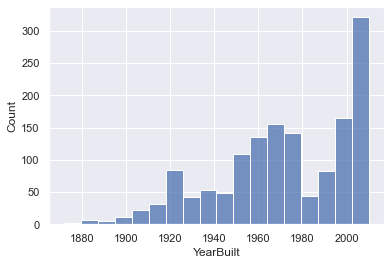

In [123]:
# Check the 'YearBuilt' field and draw a histogram
print(data["YearBuilt"].describe())
sns.histplot(data=data, x="YearBuilt")

(2000, 2010]    364
(1960, 1980]    356
(1940, 1960]    245
(1980, 2000]    238
(1920, 1940]    139
(1900, 1920]     93
(1870, 1900]     25
Name: YearBuilt, dtype: int64


[Text(0, 0, '(2000, 2010]'),
 Text(1, 0, '(1960, 1980]'),
 Text(2, 0, '(1900, 1920]'),
 Text(3, 0, '(1980, 2000]'),
 Text(4, 0, '(1920, 1940]'),
 Text(5, 0, '(1940, 1960]'),
 Text(6, 0, '(1870, 1900]')]

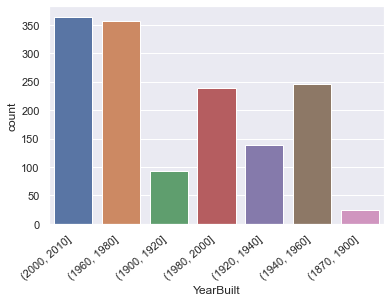

In [124]:
# Convert the 'YearBuilt' into different bin categories
data["YearBuilt"] = pd.cut(data["YearBuilt"], bins=[1870,1900, 1920, 1940, 1960, 1980, 2000, 2010]).astype(str) 

# Check the 'YearBuilt' field and draw a histogram
print(data["YearBuilt"].value_counts())
ax = sns.countplot(x="YearBuilt", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


<AxesSubplot:xlabel='YearRemodAdd', ylabel='Count'>

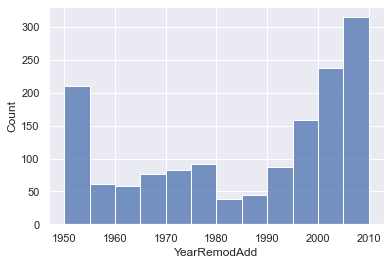

In [125]:
# Check the 'YearRemodAdd' field and draw a histogram
print(data["YearRemodAdd"].describe())
sns.histplot(data=data, x="YearRemodAdd")

(2000, 2010]    497
(1990, 2000]    285
(1940, 1950]    178
(1970, 1980]    159
(1960, 1970]    149
(1950, 1960]    106
(1980, 1990]     86
Name: YearRemodAdd, dtype: int64


[Text(0, 0, '(2000, 2010]'),
 Text(1, 0, '(1970, 1980]'),
 Text(2, 0, '(1960, 1970]'),
 Text(3, 0, '(1990, 2000]'),
 Text(4, 0, '(1940, 1950]'),
 Text(5, 0, '(1950, 1960]'),
 Text(6, 0, '(1980, 1990]')]

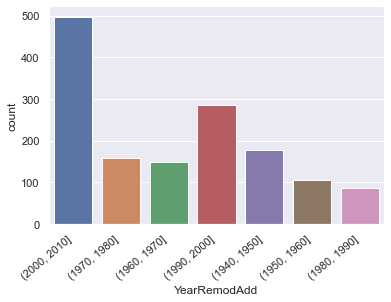

In [126]:
# Convert the 'YearRemodAdd' into different bin categories
data["YearRemodAdd"] = pd.cut(data["YearRemodAdd"], bins=[1940,1950, 1960, 1970, 1980, 1990, 2000, 2010]).astype(str) 

# Check the 'YearRemodAdd' field and draw a histogram
print(data["YearRemodAdd"].value_counts())
ax = sns.countplot(x="YearRemodAdd", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


<AxesSubplot:xlabel='GarageYrBlt', ylabel='Count'>

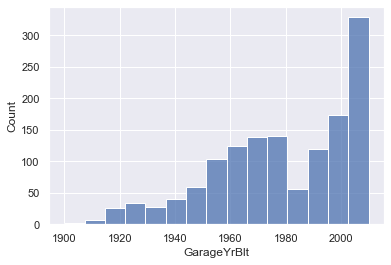

In [127]:
# Check the 'GarageYrBlt' field and draw a histogram
print(data["GarageYrBlt"].describe())
sns.histplot(data=data, x="GarageYrBlt")

(2000.0, 2010.0]    375
(1960.0, 1980.0]    367
(1980.0, 2000.0]    303
(1940.0, 1960.0]    211
(1920.0, 1940.0]     92
nan                  82
(1900.0, 1920.0]     30
Name: GarageYrBlt, dtype: int64


[Text(0, 0, '(2000.0, 2010.0]'),
 Text(1, 0, '(1960.0, 1980.0]'),
 Text(2, 0, '(1980.0, 2000.0]'),
 Text(3, 0, '(1920.0, 1940.0]'),
 Text(4, 0, '(1940.0, 1960.0]'),
 Text(5, 0, '(1900.0, 1920.0]'),
 Text(6, 0, 'nan')]

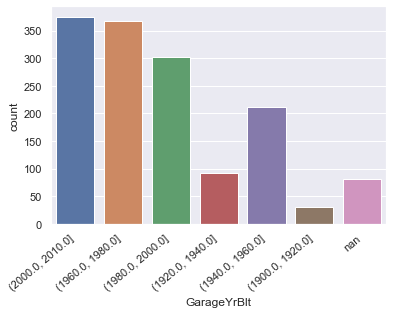

In [128]:
# Convert the 'GarageYrBlt' into different bin categories
data["GarageYrBlt"] = pd.cut(data["GarageYrBlt"], bins=[1900, 1920, 1940, 1960, 1980, 2000, 2010]).astype(str) 

# Check the 'GarageYrBlt' field and draw a histogram
print(data["GarageYrBlt"].value_counts())
ax = sns.countplot(x="GarageYrBlt", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

(2000.0, 2010.0]    375
(1960.0, 1980.0]    367
(1980.0, 2000.0]    303
(1940.0, 1960.0]    211
(1920.0, 1940.0]     92
No_year              82
(1900.0, 1920.0]     30
Name: GarageYrBlt, dtype: int64


[Text(0, 0, '(2000.0, 2010.0]'),
 Text(1, 0, '(1960.0, 1980.0]'),
 Text(2, 0, '(1980.0, 2000.0]'),
 Text(3, 0, '(1920.0, 1940.0]'),
 Text(4, 0, '(1940.0, 1960.0]'),
 Text(5, 0, '(1900.0, 1920.0]'),
 Text(6, 0, 'No_year')]

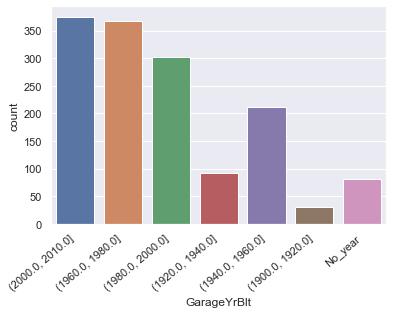

In [129]:
# Convert the 'GarageYrBlt' into different bin categories
data["GarageYrBlt"] = data["GarageYrBlt"].replace('nan', 'No_year', regex=True)

# Check the 'GarageYrBlt' field and draw a histogram
print(data["GarageYrBlt"].value_counts())
ax = sns.countplot(x="GarageYrBlt", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

#### 2.2. Action on the empty data in the columns

In [130]:
# Get the columns and the number of empty records 
data.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [131]:
# Get the columns with empty data
nan_columns = [col for col in data.columns if data[col].isnull().any()]
nan_columns
data[nan_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageFinish  1379 non-null   object 
 13  GarageQual    1379 non-null   object 
 14  GarageCond    1379 non-null   object 
 15  PoolQC        7 non-null      object 
 16  Fence         281 non-null    object 
 17  MiscFeature   54 non-null     object 
dtypes: float64(2), object(16)
me

In [132]:
# Get the unique counts of 'Alley' column
data["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [133]:
# Replace the empty data in 'Alley' column with 'None'
data["Alley"].fillna("None", inplace=True)
data["Alley"].value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [134]:
# Replace the empty data in columns related to 'Basement'  with 'None'
data["BsmtQual"].fillna("None", inplace=True)
data["BsmtCond"].fillna("None", inplace=True)
data["BsmtExposure"].fillna("None", inplace=True)
data["BsmtFinType1"].fillna("None", inplace=True)
data["BsmtFinType2"].fillna("None", inplace=True)

# Replace the empty data in 'FireplaceQu', 'Fence', 'PoolQC' and 'MiscFeature' columns with 'None'
data["FireplaceQu"].fillna("None", inplace=True)
data["Fence"].fillna("None", inplace=True)
data["PoolQC"].fillna("None", inplace=True)
data["MiscFeature"].fillna("None", inplace=True)

# Replace the empty data in columns related to 'Garage'  with 'None'
data["GarageType"].fillna("None", inplace=True)
data["GarageFinish"].fillna("None", inplace=True)
data["GarageQual"].fillna("None", inplace=True)
data["GarageCond"].fillna("None", inplace=True)

In [135]:
# Get the columns with empty data
nan_columns = [i for i in data.columns if data[i].isnull().any()]
nan_columns
data[nan_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrType   1452 non-null   object 
 2   MasVnrArea   1452 non-null   float64
 3   Electrical   1459 non-null   object 
dtypes: float64(2), object(2)
memory usage: 45.8+ KB


In [136]:
# Get the details of 'LotFrontage' column
print(data["LotFrontage"].describe())
data["LotFrontage"].value_counts()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
69.0      11
76.0      11
86.0      10
53.0      10
34.0      10
92.0      10
88.0      10
62.0       9
44.0       9
84.0       9
77.0       9
35.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
120.0      7
95.0       7
58.0       7
41.0       6
30.0       6
81.0       6
89.0       6
105.0      6
48.0       6
110.0      6
94.0       6
54.0       6
91.0       6
36.0       6
47.0       5
37.0       5
83.0       5
56.0       5
87.0       5
32.0       5
42.0       4
49.0       4
102.0      4
103.0      3
108.0      3
99.0       3
104.0      3
45.0       3
130.0      3
174.0      2

In [137]:
# Replace the empty data in 'LotFrontage' column with median of 'LotFrontage'
data["LotFrontage"].fillna(data["LotFrontage"].median(), inplace=True)
data["LotFrontage"].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [138]:
# Get the details of 'MasVnrArea' column
print(data["MasVnrArea"].describe())
print(data["MasVnrArea"].value_counts())

# Get the rows where 'MasVnrArea' column is null
data[data['MasVnrArea'].isna()]

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
76.0        4
288.0       4
456.0       4
40.0        4
50.0        3
130.0       3
82.0        3
208.0       3
90.0        3
70.0        3
44.0        3
420.0       3
99.0        3
110.0       3
104.0       3
85.0        3
272.0       3
226.0       3
174.0       3
240.0       3
186.0       3
169.0       3
148.0       3
350.0       3
128.0       3
176.0       3
166.0       3
1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,69.0,7851,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,"(2000, 2010]","(2000, 2010]",Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,"(2000.0, 2010.0]",Fin,2,440,TA,TA,Y,288,48,0,0,0,0,None,None,None,0,5,2010,WD,Normal,216500
529,20,RL,69.0,32668,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,"(1940, 1960]","(1970, 1980]",Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,"(1960.0, 1980.0]",RFn,2,484,TA,TA,Y,0,0,200,0,0,0,None,None,None,0,3,2007,WD,Alloca,200624
650,60,FV,65.0,8125,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,"(2000, 2010]","(2000, 2010]",Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,None,Attchd,"(2000.0, 2010.0]",RFn,2,562,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,205950
936,20,RL,67.0,10083,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,"(2000, 2010]","(2000, 2010]",Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,None,Attchd,"(2000.0, 2010.0]",RFn,2,555,TA,TA,Y,0,41,0,0,0,0,None,None,None,0,8,2009,WD,Normal,184900
973,20,FV,95.0,11639,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,"(2000, 2010]","(2000, 2010]",Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,None,Attchd,"(2000.0, 2010.0]",Fin,2,480,TA,TA,Y,0,120,0,0,0,0,None,None,None,0,12,2008,New,Partial,182000
977,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,"(2000, 2010]","(2000, 2010]",Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,None,Attchd,"(2000.0, 2010.0]",Fin,2,569,TA,TA,Y,0,116,0,0,0,0,None,None,None,0,11,2007,New,Partial,199900
1243,20,RL,107.0,13891,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,"(2000, 2010]","(2000, 2010]",Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,"(2000.0, 2010.0]",Fin,3,850,TA,TA,Y,216,229,0,0,0,0,None,None,None,0,9,2006,New,Partial,465000
1278,60,RL,75.0,9473,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,"(2000, 2010]","(2000, 2010]",Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,"(2000.0, 2010.0]",RFn,2,577,TA,TA,Y,0,211,0,0,0,0,None,None,None,0,3,2008,WD,Normal,237000


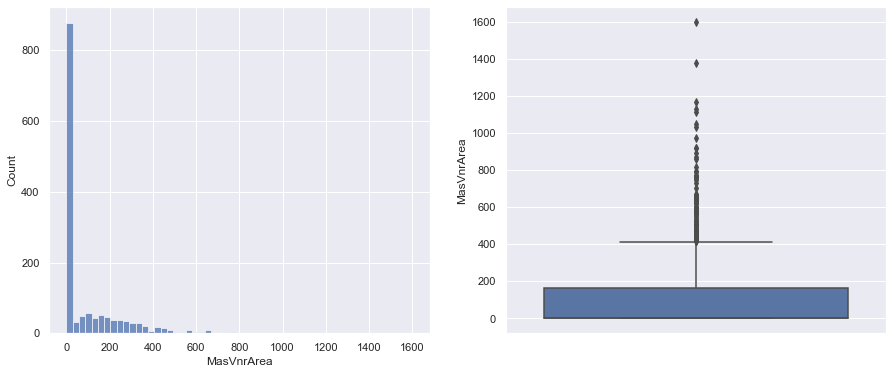

In [139]:
# Draw the graphs for 'MasVnrArea' column
fig = plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(data=data, x="MasVnrArea")

plt.subplot(1,2,2)
sns.boxplot( y=data["MasVnrArea"] );

In [140]:
# Replace the empty data in 'MasVnrArea' column with median of 'LotFrontage'
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)
data["MasVnrArea"].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [141]:
# Get more details about 'Electrical' column 
print(data['Electrical'].describe())
print(data['Electrical'].value_counts())

# Get the rows where 'Electrical' column is null
data[data['Electrical'].isna()]

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,80,RL,73.0,9735,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,"(2000, 2010]","(2000, 2010]",Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,None,BuiltIn,"(2000.0, 2010.0]",Fin,2,400,TA,TA,Y,100,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,167500


In [142]:
# Replace the empty data in 'Electrical' column with mode of 'Electrical'
data["Electrical"].fillna(data["Electrical"].mode()[0], inplace=True)

# Get more details about 'Electrical' column 
print(data['Electrical'].describe())
print(data['Electrical'].value_counts())

# Get the rows where 'Electrical' column is null
data[data['Electrical'].isna()]

count      1460
unique        5
top       SBrkr
freq       1335
Name: Electrical, dtype: object
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [143]:
# Get more details about 'MasVnrType' column 
print(data['MasVnrType'].describe())
print(data['MasVnrType'].value_counts())

# Get the rows where 'MasVnrType' column is null
data[data['MasVnrType'].isna()]

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,69.0,7851,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,"(2000, 2010]","(2000, 2010]",Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,"(2000.0, 2010.0]",Fin,2,440,TA,TA,Y,288,48,0,0,0,0,None,None,None,0,5,2010,WD,Normal,216500
529,20,RL,69.0,32668,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,"(1940, 1960]","(1970, 1980]",Hip,CompShg,Wd Sdng,Stone,NaN,0.0,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,"(1960.0, 1980.0]",RFn,2,484,TA,TA,Y,0,0,200,0,0,0,None,None,None,0,3,2007,WD,Alloca,200624
650,60,FV,65.0,8125,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,"(2000, 2010]","(2000, 2010]",Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,None,Attchd,"(2000.0, 2010.0]",RFn,2,562,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,205950
936,20,RL,67.0,10083,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,"(2000, 2010]","(2000, 2010]",Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,None,Attchd,"(2000.0, 2010.0]",RFn,2,555,TA,TA,Y,0,41,0,0,0,0,None,None,None,0,8,2009,WD,Normal,184900
973,20,FV,95.0,11639,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,"(2000, 2010]","(2000, 2010]",Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,None,Attchd,"(2000.0, 2010.0]",Fin,2,480,TA,TA,Y,0,120,0,0,0,0,None,None,None,0,12,2008,New,Partial,182000
977,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,"(2000, 2010]","(2000, 2010]",Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,None,Attchd,"(2000.0, 2010.0]",Fin,2,569,TA,TA,Y,0,116,0,0,0,0,None,None,None,0,11,2007,New,Partial,199900
1243,20,RL,107.0,13891,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,"(2000, 2010]","(2000, 2010]",Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,"(2000.0, 2010.0]",Fin,3,850,TA,TA,Y,216,229,0,0,0,0,None,None,None,0,9,2006,New,Partial,465000
1278,60,RL,75.0,9473,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,"(2000, 2010]","(2000, 2010]",Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,"(2000.0, 2010.0]",RFn,2,577,TA,TA,Y,0,211,0,0,0,0,None,None,None,0,3,2008,WD,Normal,237000


In [144]:
# Replace the empty data in 'MasVnrType' column with mode of 'MasVnrType'
data["MasVnrType"].fillna(data["MasVnrType"].mode()[0], inplace=True)

# Get more details about 'MasVnrType' column 
print(data['MasVnrType'].describe())
print(data['MasVnrType'].value_counts())

# Get the rows where 'MasVnrType' column is null
data[data['MasVnrType'].isna()]

count     1460
unique       4
top       None
freq       872
Name: MasVnrType, dtype: object
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [145]:
# Get the number of rows and columns and also check the type of the data
print(data.shape, end = "\n\n")
data.info()

(1460, 80)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 

#### 2.3. Convert categorical columns from 'int' type to 'str' type

In [146]:
str_columns = ['OverallQual', 'OverallCond','YrSold']
data[str_columns] = data[str_columns].astype(str)

In [147]:
#Get details on 'MoSold' column
data["MoSold"].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [148]:
# Convert the values in 'MoSold' column to its original month names
import calendar
data['MoSold'] = data['MoSold'].apply(lambda x : calendar.month_abbr[int(x)].lower())  # Get the abbrevated form of month from numbers
data["MoSold"].value_counts()

jun    253
jul    234
may    204
apr    141
aug    122
mar    106
oct     89
nov     79
sep     63
dec     59
jan     58
feb     52
Name: MoSold, dtype: int64

In [149]:
# Get the number of rows and columns and also check the type of the data
print(data.shape, end = "\n\n")
data.info()

(1460, 80)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 

#### 2.4. Check the graphs of different variables

# 3. Bivariate Analysis

#### 3.1. Read correlation between variables

#### 3.2. Check the relationship of 'Sales Price' with remaining variables

In [150]:
# Create a list of columns of type 'str' 
obj_columns = [col for col in data.columns if data[col].dtype=='object']
obj_columns
data[obj_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  OverallQual    1460 non-null   object
 14  OverallCond    1460 non-null   object
 15  YearBuilt      1460 non-null   object
 16  YearRemodAdd   1460 non-null   object
 17  RoofStyle      1460 non-null   object
 18  RoofMatl       1460 non-null

In [151]:
# Create a list of columns of type 'int'  and 'float'
nonobj_columns = [col for col in data.columns if data[col].dtype!='object']
nonobj_columns
data[nonobj_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   MasVnrArea     1460 non-null   float64
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinSF2     1460 non-null   int64  
 6   BsmtUnfSF      1460 non-null   int64  
 7   TotalBsmtSF    1460 non-null   int64  
 8   1stFlrSF       1460 non-null   int64  
 9   2ndFlrSF       1460 non-null   int64  
 10  LowQualFinSF   1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  BsmtFullBath   1460 non-null   int64  
 13  BsmtHalfBath   1460 non-null   int64  
 14  FullBath       1460 non-null   int64  
 15  HalfBath       1460 non-null   int64  
 16  BedroomAbvGr   1460 non-null   int64  
 17  KitchenAbvGr   1460 non-null   int64  
 18  TotRmsAb

# 4. Dummy Value creation

#### 4.1. Replace the least occuring values with 'Others' in categorical columns

In [152]:
# Show the unique value percentages for each categorical column
for col in obj_columns :
    print(col, ":", "\n")
    print(data[col].value_counts(normalize=True))

MSZoning : 

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street : 

Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
Alley : 

None    0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64
LotShape : 

Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour : 

Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities : 

AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig : 

Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope : 

Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64
Neighborhood : 

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0

In [153]:
# Below columns have data distributed in even terms and hence not replacing the least frequent values with 'Others'
restricted_cols = ["Neighborhood", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "Exterior1st", "Exterior2nd", "BsmtFinType1", "GarageYrBlt"]

# Replace the third frequent value to least frequent value in every categorical column with 'others'
for col in obj_columns :
   if col not in restricted_cols :
        values = data[col].value_counts()
        values = values.index[2:]
        data[col] = data[col].apply(lambda x:"others" if x in values else x)

In [154]:
# Show the unique value percentages for each categorical column
for col in obj_columns :
        print(col, ":", "\n")
        print(data[col].value_counts(normalize=True))

MSZoning : 

RL        0.788356
RM        0.149315
others    0.062329
Name: MSZoning, dtype: float64
Street : 

Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
Alley : 

None      0.937671
Grvl      0.034247
others    0.028082
Name: Alley, dtype: float64
LotShape : 

Reg       0.633562
IR1       0.331507
others    0.034932
Name: LotShape, dtype: float64
LandContour : 

Lvl       0.897945
others    0.058904
Bnk       0.043151
Name: LandContour, dtype: float64
Utilities : 

AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig : 

Inside    0.720548
Corner    0.180137
others    0.099315
Name: LotConfig, dtype: float64
LandSlope : 

Gtl       0.946575
Mod       0.044521
others    0.008904
Name: LandSlope, dtype: float64
Neighborhood : 

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.0397

#### 4.2. Create dummies for String variables

In [155]:
# Prefix the column name before every value in the columns of type 'str'
for col in obj_columns :
    data[col] = data[col].apply(lambda x: f"{col}_{x}")

In [156]:
# Check the data for Alley in dataframe
data['Alley'].value_counts()

Alley_None      1369
Alley_Grvl        50
Alley_others      41
Name: Alley, dtype: int64

In [157]:
# Iterate through each column and create dummies

for col in obj_columns :
    status = pd.get_dummies(data[col], drop_first = True) # Create the dummy variables for Alley column
    data = pd.concat([data, status], axis=1)              # Concat the status with main dataframe
    data.drop([col], axis = 1, inplace = True)            # Drop the original column as we have dummies created for it

data.sample(5)

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSZoning_RM,MSZoning_others,Street_Pave,Alley_None,Alley_others,LotShape_Reg,LotShape_others,LandContour_Lvl,LandContour_others,Utilities_NoSeWa,LotConfig_Inside,LotConfig_others,LandSlope_Mod,LandSlope_others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_others,Condition2_Norm,Condition2_others,BldgType_TwnhsE,BldgType_others,HouseStyle_2Story,HouseStyle_others,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,"YearBuilt_(1900, 1920]","YearBuilt_(1920, 1940]","YearBuilt_(1940, 1960]","YearBuilt_(1960, 1980]","YearBuilt_(1980, 2000]","YearBuilt_(2000, 2010]","YearRemodAdd_(1950, 1960]","YearRemodAdd_(1960, 1970]","YearRemodAdd_(1970, 1980]","YearRemodAdd_(1980, 1990]","YearRemodAdd_(1990, 2000]","YearRemodAdd_(2000, 2010]",RoofStyle_Hip,RoofStyle_others,RoofMatl_Tar&Grv,RoofMatl_others,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_others,ExterQual_TA,ExterQual_others,ExterCond_TA,ExterCond_others,Foundation_PConc,Foundation_others,BsmtQual_TA,BsmtQual_others,BsmtCond_TA,BsmtCond_others,BsmtExposure_No,BsmtExposure_others,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,BsmtFinType2_others,Heating_GasW,Heating_others,HeatingQC_TA,HeatingQC_others,CentralAir_Y,Electrical_SBrkr,Electrical_others,KitchenQual_TA,KitchenQual_others,Functional_Typ,Functional_others,FireplaceQu_None,FireplaceQu_others,GarageType_Detchd,GarageType_others,"GarageYrBlt_(1920.0, 1940.0]","GarageYrBlt_(1940.0, 1960.0]","GarageYrBlt_(1960.0, 1980.0]","GarageYrBlt_(1980.0, 2000.0]","GarageYrBlt_(2000.0, 2010.0]",GarageYrBlt_No_year,GarageFinish_Unf,GarageFinish_others,GarageQual_TA,GarageQual_others,GarageCond_TA,GarageCond_others,PavedDrive_Y,PavedDrive_others,PoolQC_None,PoolQC_others,Fence_None,Fence_others,MiscFeature_Shed,MiscFeature_others,MoSold_jun,MoSold_others,YrSold_2009,YrSold_others,SaleType_WD,SaleType_others,SaleCondition_Partial,SaleCondition_others
529,20,69.0,32668,0.0,1219,0,816,2035,2515,0,0,2515,1,0,3,0,4,2,9,2,2,484,0,0,200,0,0,0,0,200624,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1
491,50,79.0,9490,0.0,403,165,238,806,958,620,0,1578,1,0,1,0,3,1,5,2,1,240,

In [158]:
# Get the number of rows and columns and also check the type of the data
print(data.shape, end = "\n\n")
data.info()

(1460, 203)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 203 entries, MSSubClass to SaleCondition_others
dtypes: float64(2), int64(28), uint8(173)
memory usage: 589.0 KB


In [159]:
data.describe()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSZoning_RM,MSZoning_others,Street_Pave,Alley_None,Alley_others,LotShape_Reg,LotShape_others,LandContour_Lvl,LandContour_others,Utilities_NoSeWa,LotConfig_Inside,LotConfig_others,LandSlope_Mod,LandSlope_others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_others,Condition2_Norm,Condition2_others,BldgType_TwnhsE,BldgType_others,HouseStyle_2Story,HouseStyle_others,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,"YearBuilt_(1900, 1920]","YearBuilt_(1920, 1940]","YearBuilt_(1940, 1960]","YearBuilt_(1960, 1980]","YearBuilt_(1980, 2000]","YearBuilt_(2000, 2010]","YearRemodAdd_(1950, 1960]","YearRemodAdd_(1960, 1970]","YearRemodAdd_(1970, 1980]","YearRemodAdd_(1980, 1990]","YearRemodAdd_(1990, 2000]","YearRemodAdd_(2000, 2010]",RoofStyle_Hip,RoofStyle_others,RoofMatl_Tar&Grv,RoofMatl_others,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_others,ExterQual_TA,ExterQual_others,ExterCond_TA,ExterCond_others,Foundation_PConc,Foundation_others,BsmtQual_TA,BsmtQual_others,BsmtCond_TA,BsmtCond_others,BsmtExposure_No,BsmtExposure_others,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,BsmtFinType2_others,Heating_GasW,Heating_others,HeatingQC_TA,HeatingQC_others,CentralAir_Y,Electrical_SBrkr,Electrical_others,KitchenQual_TA,KitchenQual_others,Functional_Typ,Functional_others,FireplaceQu_None,FireplaceQu_others,GarageType_Detchd,GarageType_others,"GarageYrBlt_(1920.0, 1940.0]","GarageYrBlt_(1940.0, 1960.0]","GarageYrBlt_(1960.0, 1980.0]","GarageYrBlt_(1980.0, 2000.0]","GarageYrBlt_(2000.0, 2010.0]",GarageYrBlt_No_year,GarageFinish_Unf,GarageFinish_others,GarageQual_TA,GarageQual_others,GarageCond_TA,GarageCond_others,PavedDrive_Y,PavedDrive_others,PoolQC_None,PoolQC_others,Fence_None,Fence_others,MiscFeature_Shed,MiscFeature_others,MoSold_jun,MoSold_others,YrSold_2009,YrSold_others,SaleType_WD,SaleType_others,SaleCondition_Partial,SaleCondition_others
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00

In [160]:
data[data["SalePrice"]> 500000]

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSZoning_RM,MSZoning_others,Street_Pave,Alley_None,Alley_others,LotShape_Reg,LotShape_others,LandContour_Lvl,LandContour_others,Utilities_NoSeWa,LotConfig_Inside,LotConfig_others,LandSlope_Mod,LandSlope_others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_others,Condition2_Norm,Condition2_others,BldgType_TwnhsE,BldgType_others,HouseStyle_2Story,HouseStyle_others,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,"YearBuilt_(1900, 1920]","YearBuilt_(1920, 1940]","YearBuilt_(1940, 1960]","YearBuilt_(1960, 1980]","YearBuilt_(1980, 2000]","YearBuilt_(2000, 2010]","YearRemodAdd_(1950, 1960]","YearRemodAdd_(1960, 1970]","YearRemodAdd_(1970, 1980]","YearRemodAdd_(1980, 1990]","YearRemodAdd_(1990, 2000]","YearRemodAdd_(2000, 2010]",RoofStyle_Hip,RoofStyle_others,RoofMatl_Tar&Grv,RoofMatl_others,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_others,ExterQual_TA,ExterQual_others,ExterCond_TA,ExterCond_others,Foundation_PConc,Foundation_others,BsmtQual_TA,BsmtQual_others,BsmtCond_TA,BsmtCond_others,BsmtExposure_No,BsmtExposure_others,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,BsmtFinType2_others,Heating_GasW,Heating_others,HeatingQC_TA,HeatingQC_others,CentralAir_Y,Electrical_SBrkr,Electrical_others,KitchenQual_TA,KitchenQual_others,Functional_Typ,Functional_others,FireplaceQu_None,FireplaceQu_others,GarageType_Detchd,GarageType_others,"GarageYrBlt_(1920.0, 1940.0]","GarageYrBlt_(1940.0, 1960.0]","GarageYrBlt_(1960.0, 1980.0]","GarageYrBlt_(1980.0, 2000.0]","GarageYrBlt_(2000.0, 2010.0]",GarageYrBlt_No_year,GarageFinish_Unf,GarageFinish_others,GarageQual_TA,GarageQual_others,GarageCond_TA,GarageCond_others,PavedDrive_Y,PavedDrive_others,PoolQC_None,PoolQC_others,Fence_None,Fence_others,MiscFeature_Shed,MiscFeature_others,MoSold_jun,MoSold_others,YrSold_2009,YrSold_others,SaleType_WD,SaleType_others,SaleCondition_Partial,SaleCondition_others
178,20,63.0,17423,748.0,1904,0,312,2216,2234,0,0,2234,1,0,2,0,1,1,9,1,3,1166,0,60,0,0,0,0,0,501837,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
440,20,105.0,15431,200.0,1767,539,788,3094,2402,0,0,2402,1,0,2,0,2,1,10,

# 5. Splitting the Data into Training and Testing Sets

#### 5.1 Split the data into training and test sets

In [161]:
from sklearn.model_selection import train_test_split

# set the seed to zero so that same rows are placed in test and training sets everytime, the notebook is executed.
np.random.seed(0) 

# Split the data with 30% as test size
df_train,df_test = train_test_split(data, test_size=.3, random_state=101)

In [162]:
print("Training data shape", df_train.shape, sep=" : ")
print("Test data shape", df_test.shape, sep=" : ")
data.shape

Training data shape : (1022, 203)
Test data shape : (438, 203)


(1460, 203)

#### 5.2 Scale the training data using MinMaxScaler

In [163]:
# scale the numerical columns in the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [164]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSZoning_RM,MSZoning_others,Street_Pave,Alley_None,Alley_others,LotShape_Reg,LotShape_others,LandContour_Lvl,LandContour_others,Utilities_NoSeWa,LotConfig_Inside,LotConfig_others,LandSlope_Mod,LandSlope_others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_others,Condition2_Norm,Condition2_others,BldgType_TwnhsE,BldgType_others,HouseStyle_2Story,HouseStyle_others,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,"YearBuilt_(1900, 1920]","YearBuilt_(1920, 1940]","YearBuilt_(1940, 1960]","YearBuilt_(1960, 1980]","YearBuilt_(1980, 2000]","YearBuilt_(2000, 2010]","YearRemodAdd_(1950, 1960]","YearRemodAdd_(1960, 1970]","YearRemodAdd_(1970, 1980]","YearRemodAdd_(1980, 1990]","YearRemodAdd_(1990, 2000]","YearRemodAdd_(2000, 2010]",RoofStyle_Hip,RoofStyle_others,RoofMatl_Tar&Grv,RoofMatl_others,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_others,ExterQual_TA,ExterQual_others,ExterCond_TA,ExterCond_others,Foundation_PConc,Foundation_others,BsmtQual_TA,BsmtQual_others,BsmtCond_TA,BsmtCond_others,BsmtExposure_No,BsmtExposure_others,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,BsmtFinType2_others,Heating_GasW,Heating_others,HeatingQC_TA,HeatingQC_others,CentralAir_Y,Electrical_SBrkr,Electrical_others,KitchenQual_TA,KitchenQual_others,Functional_Typ,Functional_others,FireplaceQu_None,FireplaceQu_others,GarageType_Detchd,GarageType_others,"GarageYrBlt_(1920.0, 1940.0]","GarageYrBlt_(1940.0, 1960.0]","GarageYrBlt_(1960.0, 1980.0]","GarageYrBlt_(1980.0, 2000.0]","GarageYrBlt_(2000.0, 2010.0]",GarageYrBlt_No_year,GarageFinish_Unf,GarageFinish_others,GarageQual_TA,GarageQual_others,GarageCond_TA,GarageCond_others,PavedDrive_Y,PavedDrive_others,PoolQC_None,PoolQC_others,Fence_None,Fence_others,MiscFeature_Shed,MiscFeature_others,MoSold_jun,MoSold_others,YrSold_2009,YrSold_others,SaleType_WD,SaleType_others,SaleCondition_Partial,SaleCondition_others
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.00

In [165]:
# Apply scaler() to all the columns except the 'dummy' variables

pd.options.mode.chained_assignment = None  # to mitigate SettingWithCopyWarning

df_train[nonobj_columns] = scaler.fit_transform(df_train[nonobj_columns])

In [166]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSZoning_RM,MSZoning_others,Street_Pave,Alley_None,Alley_others,LotShape_Reg,LotShape_others,LandContour_Lvl,LandContour_others,Utilities_NoSeWa,LotConfig_Inside,LotConfig_others,LandSlope_Mod,LandSlope_others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_others,Condition2_Norm,Condition2_others,BldgType_TwnhsE,BldgType_others,HouseStyle_2Story,HouseStyle_others,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,"YearBuilt_(1900, 1920]","YearBuilt_(1920, 1940]","YearBuilt_(1940, 1960]","YearBuilt_(1960, 1980]","YearBuilt_(1980, 2000]","YearBuilt_(2000, 2010]","YearRemodAdd_(1950, 1960]","YearRemodAdd_(1960, 1970]","YearRemodAdd_(1970, 1980]","YearRemodAdd_(1980, 1990]","YearRemodAdd_(1990, 2000]","YearRemodAdd_(2000, 2010]",RoofStyle_Hip,RoofStyle_others,RoofMatl_Tar&Grv,RoofMatl_others,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_others,ExterQual_TA,ExterQual_others,ExterCond_TA,ExterCond_others,Foundation_PConc,Foundation_others,BsmtQual_TA,BsmtQual_others,BsmtCond_TA,BsmtCond_others,BsmtExposure_No,BsmtExposure_others,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,BsmtFinType2_others,Heating_GasW,Heating_others,HeatingQC_TA,HeatingQC_others,CentralAir_Y,Electrical_SBrkr,Electrical_others,KitchenQual_TA,KitchenQual_others,Functional_Typ,Functional_others,FireplaceQu_None,FireplaceQu_others,GarageType_Detchd,GarageType_others,"GarageYrBlt_(1920.0, 1940.0]","GarageYrBlt_(1940.0, 1960.0]","GarageYrBlt_(1960.0, 1980.0]","GarageYrBlt_(1980.0, 2000.0]","GarageYrBlt_(2000.0, 2010.0]",GarageYrBlt_No_year,GarageFinish_Unf,GarageFinish_others,GarageQual_TA,GarageQual_others,GarageCond_TA,GarageCond_others,PavedDrive_Y,PavedDrive_others,PoolQC_None,PoolQC_others,Fence_None,Fence_others,MiscFeature_Shed,MiscFeature_others,MoSold_jun,MoSold_others,YrSold_2009,YrSold_others,SaleType_WD,SaleType_others,SaleCondition_Partial,SaleCondition_others
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.00

#### 5.3 Dividing into X and Y sets for the model building

In [167]:
y_train = df_train.pop("SalePrice")
X_train = df_train
X_train_additional = df_train

In [168]:
print(X_train.columns, end = "\n\n")

X_train.info()

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'MiscFeature_Shed', 'MiscFeature_others', 'MoSold_jun', 'MoSold_others',
       'YrSold_2009', 'YrSold_others', 'SaleType_WD', 'SaleType_others',
       'SaleCondition_Partial', 'SaleCondition_others'],
      dtype='object', length=202)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 1312 to 863
Columns: 202 entries, MSSubClass to SaleCondition_others
dtypes: float64(29), uint8(173)
memory usage: 412.2 KB


# 6. Build the model

#### 6.1 Build the initial model using OLS method

In [169]:
# Add constant
X_train_lm = sm.add_constant(X_train)

# Build linear model using OLS
lm = sm.OLS(y_train, X_train_lm).fit()

# Get the summary of linear model regression
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     50.36
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        07:37:01   Log-Likelihood:                 2093.3
No. Observations:                1022   AIC:                            -3793.
Df Residuals:                     825   BIC:                            -2822.
Df Model:                         196                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0022      0.232      0.010      0.992      -0.453       0.458
MSSubClass                      -0.0060      0.017     -0.362      0.717      -0.039       0.027
LotFrontage                      0.0139      0.022      0.636      0.525      -0.029       0.057
LotArea                          0.0992      0.039      2.521      0.012       0.022       0.176
MasVnrArea                       0.0289      0.017      1.729      0.084      -0.004       0.062
BsmtFinSF1                       0.0563      0.012      4.766      0.000       0.033       0.080
BsmtFinSF2                       0.0497      0.017      2.847      0.005       0.015       0.084
BsmtUnfSF                        0.0067      0.011      0.638      0.523      -0.014       0.027
TotalBsmtSF                      0.0671      0.015      4.514      0.000       0.038       0.096
1stFlrSF                         0.0911      0.021      4.400      0.000       0.050       0.132
2ndFlrSF                         0.0948      0.016      6.032      0.000       0.064       0.126
LowQualFinSF                    -0.0158      0.016     -1.013      0.311      -0.046       0.015
GrLivArea                        0.1056      0.015      7.131      0.000       0.077       0.135
BsmtFullBath                     0.0131      0.011      1.174      0.241      -0.009       0.035
BsmtHalfBath                    -0.0053      0.011     -0.467      0.641      -0.028       0.017
FullBath                         0.0085      0.012      0.695      0.487      -0.015       0.032
HalfBath                         0.0018      0.008      0.238      0.812      -0.013       0.017
BedroomAbvGr                    -0.0307      0.020     -1.556      0.120      -0.069       0.008
KitchenAbvGr                    -0.0538      0.029     -1.866      0.062      -0.110       0.003
TotRmsAbvGrd                     0.0584      0.019      3.032      0.003       0.021       0.096
Fireplaces                       0.0254      0.014      1.798      0.073      -0.002       0.053
GarageCars                       0.0317      0.017      1.877      0.061      -0.001       0.065
GarageArea                       0.0310      0.020      1.522      0.128      -0.009       0.071
WoodDeckSF                       0.0088      0.010      0.918      0.359      -0.010       0.028
OpenPorchSF                      0.0048      0.011      0.415      0.678      -0.018       0.027
EnclosedPorch                    0.0125      0.012      1.002      0.317      -0.012       0.037
3SsnPorch                        0.0383      0.020      1.883      0.060      -0.002       0.078
ScreenPorch                      0.0186      0.011      1.771      0.077      -0.002       0.039
PoolArea                         0.1073      0.241      0.445      0.657    

#### 6.2 Perform RFE and select top 100 features

In [170]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [171]:
X_train.shape

(1022, 202)

In [172]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 146),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 79),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 20),
 ('BsmtUnfSF', False, 27),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 19),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 109),
 ('BsmtHalfBath', False, 130),
 ('FullBath', False, 75),
 ('HalfBath', False, 177),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 39),
 ('GarageCars', False, 10),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 66),
 ('OpenPorchSF', False, 71),
 ('EnclosedPorch', False, 77),
 ('3SsnPorch', False, 43),
 ('ScreenPorch', False, 55),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('MSZoning_RM', False, 80),
 ('MSZoning_others', False, 101),
 ('Street_Pave', True, 1),
 ('Alley_None', False, 135),
 ('Alley_others', False, 114),
 ('LotShape_Reg', False, 136),
 ('LotShape_others', False, 6

In [173]:
# Get the columns selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'GarageArea', 'PoolArea', 'MiscVal', 'Street_Pave', 'Condition2_others',
       'OverallQual_10', 'OverallQual_8', 'OverallQual_9', 'OverallCond_9',
       'YearBuilt_(1920, 1940]', 'YearBuilt_(1980, 2000]',
       'YearBuilt_(2000, 2010]', 'GarageYrBlt_No_year', 'GarageQual_TA',
       'GarageQual_others'],
      dtype='object')

In [174]:
# Show the columns unselected by RFE
nonrfe_col = X_train.columns[~rfe.support_]
nonrfe_col

Index(['MSSubClass', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Fireplaces',
       ...
       'MiscFeature_Shed', 'MiscFeature_others', 'MoSold_jun', 'MoSold_others',
       'YrSold_2009', 'YrSold_others', 'SaleType_WD', 'SaleType_others',
       'SaleCondition_Partial', 'SaleCondition_others'],
      dtype='object', length=177)

In [175]:
X_train.shape

(1022, 202)

In [176]:
X_train_rfe = X_train[rfe_col] 

# Add constant
X_train_lm = sm.add_constant(X_train_rfe)

# Build linear model using OLS
lm = sm.OLS(y_train, X_train_lm).fit()

# Get the summary of linear model regression
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     247.8
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        07:37:22   Log-Likelihood:                 1794.2
No. Observations:                1022   AIC:                            -3536.
Df Residuals:                     996   BIC:                            -3408.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0482      0.048      0.998      0.318      -0.047       0.143
LotFrontage                0.0681      0.020      3.349      0.001       0.028       0.108
LotArea                    0.1683      0.036      4.731      0.000       0.098       0.238
BsmtFinSF1                 0.0749      0.008      8.956      0.000       0.059       0.091
TotalBsmtSF                0.1080      0.020      5.297      0.000       0.068       0.148
1stFlrSF                   0.4065      0.083      4.872      0.000       0.243       0.570
2ndFlrSF                   0.3069      0.059      5.167      0.000       0.190       0.423
GrLivArea                 -0.2846      0.121     -2.347      0.019      -0.523      -0.047
BedroomAbvGr              -0.0703      0.020     -3.535      0.000      -0.109      -0.031
KitchenAbvGr              -0.1228      0.022     -5.633      0.000      -0.166      -0.080
TotRmsAbvGrd               0.0522      0.020      2.591      0.010       0.013       0.092
GarageArea                 0.0805      0.014      5.641      0.000       0.052       0.108
PoolArea                   0.0484      0.023      2.145      0.032       0.004       0.093
MiscVal                    0.0587      0.036      1.632      0.103      -0.012       0.129
Street_Pave                0.0657      0.021      3.139      0.002       0.025       0.107
Condition2_others         -0.1380      0.018     -7.711      0.000      -0.173      -0.103
OverallQual_10             0.1788      0.015     11.673      0.000       0.149       0.209
OverallQual_8              0.0447      0.005      8.950      0.000       0.035       0.054
OverallQual_9              0.1382      0.009     14.822      0.000       0.120       0.156
OverallCond_9              0.0373      0.011      3.414      0.001       0.016       0.059
YearBuilt_(1920, 1940]     0.0105      0.005      2.131      0.033       0.001       0.020
YearBuilt_(1980, 2000]     0.0371      0.004      8.588      0.000       0.029       0.046
YearBuilt_(2000, 2010]     0.0521      0.004     12.060      0.000       0.044       0.061
GarageYrBlt_No_year       -0.0838      0.043     -1.944      0.052      -0.168       0.001
GarageQual_TA             -0.0809      0.044     -1.857      0.064      -0.166       0.005
GarageQual_others         -0.0813      0.044     -1.846      0.065      -0.168       0.005
==============================================================================
Omnibus:                      508.855   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29542.202
Skew:                          -1.479   Prob(JB):                         0.00
Kurtosis:                      29.173   Cond. No.                         231.
=================================================

In [177]:
X_train.shape

(1022, 202)

In [178]:
# Access P-values
lm.pvalues

const                     3.184725e-01
LotFrontage               8.404664e-04
LotArea                   2.553514e-06
BsmtFinSF1                1.618399e-18
TotalBsmtSF               1.446173e-07
1stFlrSF                  1.287644e-06
2ndFlrSF                  2.873359e-07
GrLivArea                 1.913304e-02
BedroomAbvGr              4.263817e-04
KitchenAbvGr              2.306529e-08
TotRmsAbvGrd              9.716437e-03
GarageArea                2.202040e-08
PoolArea                  3.217368e-02
MiscVal                   1.029653e-01
Street_Pave               1.745006e-03
Condition2_others         3.022436e-14
OverallQual_10            1.337550e-29
OverallQual_8             1.699170e-18
OverallQual_9             4.583094e-45
OverallCond_9             6.663919e-04
YearBuilt_(1920, 1940]    3.330708e-02
YearBuilt_(1980, 2000]    3.375698e-17
YearBuilt_(2000, 2010]    2.322651e-31
GarageYrBlt_No_year       5.223573e-02
GarageQual_TA             6.362382e-02
GarageQual_others        

In [179]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Features,VIF
86,OverallCond_4,inf
83,OverallQual_9,inf
85,OverallCond_3,inf
82,OverallQual_8,inf
87,OverallCond_5,inf
76,OverallQual_2,inf
75,OverallQual_10,inf
77,OverallQual_3,inf
125,Exterior2nd_CBlock,inf
78,OverallQual_4,inf


In [180]:
# Get p-values and vif in single dataframe

vif.set_index("Features", inplace=True)            # make features as an index in vif dataframe
vif = pd.concat([vif, lm.pvalues], axis = 1)     # add p-values to vif dataframe
vif.columns = ['VIF', 'p-value']                   # add column names to vif dataframe
vif = vif.sort_values(by = "p-value", ascending = False)
vif

,VIF,p-value
const,NaN,3.184725e-01
MiscVal,2.69,1.029653e-01
GarageQual_others,inf,6.522059e-02
GarageQual_TA,inf,6.362382e-02
GarageYrBlt_No_year,87.90,5.223573e-02
"YearBuilt_(1920, 1940]",12.35,3.330708e-02
PoolArea,182.11,3.217368e-02
GrLivArea,14825857.55,1.913304e-02
TotRmsAbvGrd,6.78,9.716437e-03
Street_Pave,1.76,1.745006e-03


In [181]:
# Function to show vif and p-values in a single dataframe
def get_vif_and_pvalue(df, is_pvalue_sort=True, is_print=True) :
    # Add constant
    df = sm.add_constant(df)
    
    # Build linear model using OLS
    model = sm.OLS(y_train, df).fit()
    
    print("R-squared", model.rsquared, sep = " : ")
    print("Adjusted R-squared", model.rsquared_adj, end = "\n\n", sep = " : ")
    
    # Create a dataframe for p-values
    result = model.pvalues.to_frame()
    result = pd.concat([result, model.params], axis = 1)     # add regression coefficient to dataframe
    result.drop(result.index[[0]], inplace=True)            # remove values of constant from dataframe
    
    # Add column names to result dataframe
    result.columns = ['p-value', 'coeff']  
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    result['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    
    # Round the values to 2-3 decimals in the dataframe
    result['p-value'] = round(result['p-value'], 3)
    result['VIF'] = round(result['VIF'], 2)
    result['coeff'] = round(result['coeff'], 3)
    
    # Sort the dataframe
    if(is_pvalue_sort) : 
        result = result.sort_values(by = "VIF", ascending = False)
        if(is_print) : 
            print(result)
        result = result.sort_values(by = "p-value", ascending = False)
    else : 
        result = result.sort_values(by = "VIF", ascending = False)
        
    return result

In [182]:
# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.9228629586933609
Adjusted R-squared : 0.9045370676677836



/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                              p-value  coeff          VIF
OverallCond_4                   0.519  0.016          inf
OverallQual_9                   0.000  0.101          inf
OverallCond_3                   0.972  0.001          inf
OverallQual_8                   0.120  0.034          inf
OverallCond_5                   0.181  0.032          inf
OverallQual_2                   0.768  0.010          inf
OverallQual_10                  0.000  0.153          inf
OverallQual_3                   0.350 -0.023          inf
Exterior2nd_CBlock              0.870  0.003          inf
OverallQual_4                   0.856 -0.004          inf
GarageQual_TA                   0.012 -0.057          inf
OverallCond_6                   0.078  0.042          inf
OverallCond_7                   0.040  0.049          inf
OverallCond_8                   0.020  0.057          inf
OverallCond_9                   0.002  0.079          inf
GarageQual_others               0.046 -0.046          inf
GarageCond_TA 

,p-value,coeff,VIF
Neighborhood_SWISU,0.979,0.000,4.76
Neighborhood_NWAmes,0.974,0.000,9.38
OverallCond_3,0.972,0.001,inf
Exterior2nd_MetalSd,0.962,-0.001,60.24
Exterior2nd_Wd Shng,0.959,0.001,11.01
Neighborhood_OldTown,0.950,-0.001,18.29
GarageFinish_Unf,0.945,-0.000,3.40
OverallQual_6,0.938,0.002,inf
LotConfig_others,0.926,0.000,2.05
Exterior2nd_Other,0.925,-0.004,1.52


In [183]:
#Remove Exterior1st_Stone as VIF is NaN and p-value is large
X_train = X_train.drop(["Exterior1st_Stone"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.9228629586933609
Adjusted R-squared : 0.9045370676677836



/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                              p-value  coeff          VIF
OverallCond_4                   0.519  0.016          inf
OverallQual_9                   0.000  0.101          inf
OverallCond_3                   0.972  0.001          inf
OverallQual_8                   0.120  0.034          inf
OverallCond_5                   0.181  0.032          inf
OverallQual_2                   0.768  0.010          inf
OverallQual_10                  0.000  0.153          inf
OverallQual_3                   0.350 -0.023          inf
Exterior2nd_CBlock              0.870  0.003          inf
OverallQual_4                   0.856 -0.004          inf
GarageQual_TA                   0.012 -0.057          inf
OverallCond_6                   0.078  0.042          inf
OverallCond_7                   0.040  0.049          inf
OverallCond_8                   0.020  0.057          inf
OverallCond_9                   0.002  0.079          inf
GarageQual_others               0.046 -0.046          inf
GarageCond_TA 

,p-value,coeff,VIF
Neighborhood_SWISU,0.979,0.000,4.76
Neighborhood_NWAmes,0.974,0.000,9.38
OverallCond_3,0.972,0.001,inf
Exterior2nd_MetalSd,0.962,-0.001,60.24
Exterior2nd_Wd Shng,0.959,0.001,11.01
Neighborhood_OldTown,0.950,-0.001,18.29
GarageFinish_Unf,0.945,-0.000,3.40
OverallQual_6,0.938,0.002,inf
LotConfig_others,0.926,0.000,2.05
Exterior2nd_Other,0.925,-0.004,1.52


In [184]:
# Remove OverallCond_4 as VIF is infinity
X_train = X_train.drop(["OverallCond_4"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.9228629586933609
Adjusted R-squared : 0.9045370676677836



/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                              p-value  coeff          VIF
Exterior1st_CBlock              0.870  0.003          inf
Exterior2nd_CBlock              0.870  0.003          inf
GarageCond_others               0.009 -0.061          inf
GarageCond_TA                   0.064 -0.042          inf
BsmtFinSF1                      0.000  0.056          inf
BsmtFinSF2                      0.005  0.050          inf
BsmtUnfSF                       0.523  0.007          inf
TotalBsmtSF                     0.000  0.067          inf
GarageQual_others               0.046 -0.046          inf
GarageQual_TA                   0.012 -0.057          inf
GrLivArea                       0.000  0.106  14825857.55
1stFlrSF                        0.000  0.091   8077582.49
2ndFlrSF                        0.000  0.095   3192189.09
LowQualFinSF                    0.311 -0.016     24568.68
OverallQual_5                   0.791  0.012       339.23
OverallQual_6                   0.700  0.017       318.98
OverallQual_7 

,p-value,coeff,VIF
Neighborhood_SWISU,0.979,0.000,4.76
Neighborhood_NWAmes,0.974,0.000,9.38
Exterior2nd_MetalSd,0.962,-0.001,60.24
Exterior2nd_Wd Shng,0.959,0.001,11.01
Neighborhood_OldTown,0.950,-0.001,18.29
GarageFinish_Unf,0.945,-0.000,3.40
LotConfig_others,0.926,0.000,2.05
Exterior2nd_Other,0.925,-0.004,1.52
Exterior2nd_Brk Cmn,0.924,0.003,5.47
Neighborhood_Sawyer,0.897,-0.002,10.22


In [185]:
# Remove Exterior1st_CBlock as VIF is infinity
X_train = X_train.drop(["Exterior1st_CBlock"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.9228629586933609
Adjusted R-squared : 0.9045370676677836



/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                              p-value  coeff          VIF
GarageCond_TA                   0.064 -0.042          inf
GarageQual_others               0.046 -0.046          inf
GarageCond_others               0.009 -0.061          inf
BsmtFinSF1                      0.000  0.056          inf
BsmtFinSF2                      0.005  0.050          inf
BsmtUnfSF                       0.523  0.007          inf
TotalBsmtSF                     0.000  0.067          inf
GarageQual_TA                   0.012 -0.057          inf
GrLivArea                       0.000  0.106  14825857.55
1stFlrSF                        0.000  0.091   8077582.49
2ndFlrSF                        0.000  0.095   3192189.09
LowQualFinSF                    0.311 -0.016     24568.68
OverallQual_5                   0.791  0.012       339.23
OverallQual_6                   0.700  0.017       318.98
OverallQual_7                   0.561  0.026       291.18
PoolQC_None                     0.787  0.059       194.36
OverallQual_8 

,p-value,coeff,VIF
Neighborhood_SWISU,0.979,0.000,4.76
Neighborhood_NWAmes,0.974,0.000,9.38
Exterior2nd_MetalSd,0.962,-0.001,60.24
Exterior2nd_Wd Shng,0.959,0.001,11.01
Neighborhood_OldTown,0.950,-0.001,18.29
GarageFinish_Unf,0.945,-0.000,3.40
LotConfig_others,0.926,0.000,2.05
Exterior2nd_Other,0.925,-0.004,1.52
Exterior2nd_Brk Cmn,0.924,0.003,5.47
Neighborhood_Sawyer,0.897,-0.002,10.22


In [186]:
# Remove GarageCond_TA as VIF is infinity
X_train = X_train.drop(["GarageCond_TA"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.9228629586933609
Adjusted R-squared : 0.9045370676677836



/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                              p-value  coeff          VIF
BsmtFinSF1                      0.000  0.056          inf
BsmtFinSF2                      0.005  0.050          inf
BsmtUnfSF                       0.523  0.007          inf
TotalBsmtSF                     0.000  0.067          inf
GrLivArea                       0.000  0.106  14825857.55
1stFlrSF                        0.000  0.091   8077582.49
2ndFlrSF                        0.000  0.095   3192189.09
LowQualFinSF                    0.311 -0.016     24568.68
OverallQual_5                   0.791  0.012       339.23
OverallQual_6                   0.700  0.017       318.98
OverallQual_7                   0.561  0.026       291.18
PoolQC_None                     0.787  0.059       194.36
OverallQual_8                   0.272  0.050       189.72
PoolArea                        0.657  0.107       182.11
GarageQual_TA                   0.027 -0.099       151.22
OverallQual_4                   0.793  0.012       118.64
Exterior1st_Vi

,p-value,coeff,VIF
Neighborhood_SWISU,0.979,0.000,4.76
Neighborhood_NWAmes,0.974,0.000,9.38
Exterior2nd_MetalSd,0.962,-0.001,60.24
Exterior2nd_Wd Shng,0.959,0.001,11.01
Neighborhood_OldTown,0.950,-0.001,18.29
GarageFinish_Unf,0.945,-0.000,3.40
LotConfig_others,0.926,0.000,2.05
Exterior2nd_Other,0.925,-0.004,1.52
Exterior2nd_Brk Cmn,0.924,0.003,5.47
Neighborhood_Sawyer,0.897,-0.002,10.22


In [187]:
# Remove BsmtUnfSF as VIF is infinity
X_train = X_train.drop(["BsmtUnfSF"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.9228629586933609
Adjusted R-squared : 0.9045370676677836

                              p-value  coeff          VIF
GrLivArea                       0.000  0.106  14825857.55
1stFlrSF                        0.000  0.091   8077582.49
2ndFlrSF                        0.000  0.095   3192189.09
LowQualFinSF                    0.311 -0.016     24568.68
OverallQual_5                   0.791  0.012       339.23
OverallQual_6                   0.700  0.017       318.98
OverallQual_7                   0.561  0.026       291.18
PoolQC_None                     0.787  0.059       194.36
OverallQual_8                   0.272  0.050       189.72
PoolArea                        0.657  0.107       182.11
GarageQual_TA                   0.027 -0.099       151.22
OverallQual_4                   0.793  0.012       118.64
Exterior1st_VinylSd             0.766 -0.006        91.97
GarageYrBlt_No_year             0.033 -0.095        87.90
Exterior2nd_VinylSd             0.241  0.025        84.91


,p-value,coeff,VIF
Neighborhood_SWISU,0.979,0.000,4.76
Neighborhood_NWAmes,0.974,0.000,9.38
Exterior2nd_MetalSd,0.962,-0.001,60.24
Exterior2nd_Wd Shng,0.959,0.001,11.01
Neighborhood_OldTown,0.950,-0.001,18.29
GarageFinish_Unf,0.945,-0.000,3.40
LotConfig_others,0.926,0.000,2.05
Exterior2nd_Other,0.925,-0.004,1.52
Exterior2nd_Brk Cmn,0.924,0.003,5.47
Neighborhood_Sawyer,0.897,-0.002,10.22


In [188]:
# Remove GrLivArea as VIF is too large
X_train = X_train.drop(["GrLivArea"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.9228629586933609
Adjusted R-squared : 0.9045370676677836

                              p-value  coeff      VIF
PoolQC_None                     0.787  0.059  4755.98
GarageQual_TA                   0.027 -0.099  1469.12
Condition2_Norm                 0.639 -0.015   791.13
OverallQual_5                   0.791  0.012   459.07
OverallQual_6                   0.700  0.017   415.77
SaleType_WD                     0.115 -0.036   386.17
OverallQual_7                   0.561  0.026   362.86
Street_Pave                     0.256  0.023   356.59
OverallQual_8                   0.272  0.050   211.75
Exterior1st_VinylSd             0.766 -0.006   143.94
Exterior2nd_VinylSd             0.241  0.025   130.78
OverallQual_4                   0.793  0.012   125.41
GarageYrBlt_No_year             0.033 -0.095    89.89
YearBuilt_(2000, 2010]          0.006  0.056    88.83
KitchenAbvGr                    0.062 -0.054    87.81
TotalBsmtSF                     0.005  0.077    81.96
Exterior1s

,p-value,coeff,VIF
Neighborhood_SWISU,0.979,0.000,4.83
Neighborhood_NWAmes,0.974,0.000,9.90
Exterior2nd_MetalSd,0.962,-0.001,70.04
Exterior2nd_Wd Shng,0.959,0.001,11.37
Neighborhood_OldTown,0.950,-0.001,19.76
GarageFinish_Unf,0.945,-0.000,5.71
LotConfig_others,0.926,0.000,2.29
Exterior2nd_Other,0.925,-0.004,1.52
Exterior2nd_Brk Cmn,0.924,0.003,5.49
Neighborhood_Sawyer,0.897,-0.002,10.76


In [189]:
# Remove the variables with high p-values
result = get_vif_and_pvalue(X_train, True, False)
while (result['p-value'][0] > 0.05) : 
    del_value = result[result['p-value'] == result['p-value'][0]].index.values[0]
    print(del_value)
    X_train = X_train.drop([del_value], axis = 1)
    result = get_vif_and_pvalue(X_train, True, False)

R-squared : 0.9228629586933609
Adjusted R-squared : 0.9045370676677836

Neighborhood_SWISU
R-squared : 0.9228628948516483
Adjusted R-squared : 0.9046525613117832

Neighborhood_NWAmes
R-squared : 0.9228628573996878
Adjusted R-squared : 0.904767808228635

Exterior2nd_MetalSd
R-squared : 0.9228626457365516
Adjusted R-squared : 0.9048825619529217

GarageFinish_Unf
R-squared : 0.9228621750324602
Adjusted R-squared : 0.9049967197926921

Exterior2nd_Other
R-squared : 0.9228614701646556
Adjusted R-squared : 0.905110314503751



KeyboardInterrupt: 

In [ ]:
# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

In [ ]:
# Remove the variables with high VIF values
result = get_vif_and_pvalue(X_train, False, False)
while (result['VIF'][0] > 10) : 
    del_value = result[result['VIF'] == result['VIF'][0]].index.values[0]
    print(del_value)
    X_train = X_train.drop([del_value], axis = 1)
    result = get_vif_and_pvalue(X_train, False, False)
    # After removing a high VIF variable, check and remove the variables with high P-values
    while (result['p-value'][0] > 0.05) :
        del_value = result[result['p-value'] == result['p-value'][0]].index.values[0]
        print(del_value)
        X_train = X_train.drop([del_value], axis = 1)
        result = get_vif_and_pvalue(X_train, True, False)

In [83]:
# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.859441151300199
Adjusted R-squared : 0.854451739835196

                        p-value  coeff   VIF
YearBuilt_(2000, 2010]    0.000  0.078  4.41
OverallQual_8             0.000  0.094  3.22
OverallQual_7             0.000  0.049  3.15
Fireplaces                0.000  0.054  3.01
BsmtFinSF1                0.000  0.096  2.95
LotArea                   0.000  0.249  2.88
YearBuilt_(1980, 2000]    0.000  0.048  2.80
BsmtExposure_No           0.013 -0.008  2.78
YearBuilt_(1960, 1980]    0.000  0.019  2.34
2ndFlrSF                  0.000  0.081  2.29
OverallQual_9             0.000  0.194  2.25
OverallQual_6             0.000  0.020  2.17
YearBuilt_(1940, 1960]    0.008  0.014  1.81
Neighborhood_NridgHt      0.000  0.040  1.80
BsmtQual_others           0.010  0.013  1.68
KitchenQual_others        0.001  0.019  1.67
OverallQual_10            0.000  0.263  1.67
Neighborhood_NoRidge      0.000  0.090  1.52
OverallCond_6             0.002  0.013  1.49
MSZoning_RM               0.00

,p-value,coeff,VIF
LotShape_others,0.030,0.017,1.15
Condition1_others,0.022,-0.012,1.20
BsmtExposure_No,0.013,-0.008,2.78
SaleCondition_others,0.011,-0.012,1.15
BsmtQual_others,0.010,0.013,1.68
"YearBuilt_(1940, 1960]",0.008,0.014,1.81
Neighborhood_Somerst,0.002,0.020,1.40
OverallCond_6,0.002,0.013,1.49
KitchenQual_others,0.001,0.019,1.67
PoolArea,0.001,0.075,1.07


In [84]:
# Remove the variables with high p-values
result = get_vif_and_pvalue(X_train, True, False)
while (result['p-value'][0] > 0.05) : 
    del_value = result[result['p-value'] == result['p-value'][0]].index.values[0]
    print(del_value)
    X_train = X_train.drop([del_value], axis = 1)
    result = get_vif_and_pvalue(X_train, True, False)

R-squared : 0.859441151300199
Adjusted R-squared : 0.854451739835196



In [85]:
# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.859441151300199
Adjusted R-squared : 0.854451739835196

                        p-value  coeff   VIF
YearBuilt_(2000, 2010]    0.000  0.078  4.41
OverallQual_8             0.000  0.094  3.22
OverallQual_7             0.000  0.049  3.15
Fireplaces                0.000  0.054  3.01
BsmtFinSF1                0.000  0.096  2.95
LotArea                   0.000  0.249  2.88
YearBuilt_(1980, 2000]    0.000  0.048  2.80
BsmtExposure_No           0.013 -0.008  2.78
YearBuilt_(1960, 1980]    0.000  0.019  2.34
2ndFlrSF                  0.000  0.081  2.29
OverallQual_9             0.000  0.194  2.25
OverallQual_6             0.000  0.020  2.17
YearBuilt_(1940, 1960]    0.008  0.014  1.81
Neighborhood_NridgHt      0.000  0.040  1.80
BsmtQual_others           0.010  0.013  1.68
KitchenQual_others        0.001  0.019  1.67
OverallQual_10            0.000  0.263  1.67
Neighborhood_NoRidge      0.000  0.090  1.52
OverallCond_6             0.002  0.013  1.49
MSZoning_RM               0.00

,p-value,coeff,VIF
LotShape_others,0.030,0.017,1.15
Condition1_others,0.022,-0.012,1.20
BsmtExposure_No,0.013,-0.008,2.78
SaleCondition_others,0.011,-0.012,1.15
BsmtQual_others,0.010,0.013,1.68
"YearBuilt_(1940, 1960]",0.008,0.014,1.81
Neighborhood_Somerst,0.002,0.020,1.40
OverallCond_6,0.002,0.013,1.49
KitchenQual_others,0.001,0.019,1.67
PoolArea,0.001,0.075,1.07


#### 6.3 Build the final model using OLS method

In [86]:
# Add constant
X_train_lm = sm.add_constant(X_train)

# Build linear model using OLS
lin_model = sm.OLS(y_train, X_train_lm).fit()

# Get the summary of linear model regression
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:49:14   Log-Likelihood:                 1786.7
No. Observations:                1022   AIC:                            -3501.
Df Residuals:                     986   BIC:                            -3324.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0664      0.007     10.214      0.000       0.054       0.079
LotArea                    0.2495      0.034      7.337      0.000       0.183       0.316
BsmtFinSF1                 0.0960      0.008     11.477      0.000       0.080       0.112
BsmtFinSF2                 0.0615      0.012      4.970      0.000       0.037       0.086
2ndFlrSF                   0.0805      0.008     10.499      0.000       0.065       0.096
Fireplaces                 0.0542      0.008      6.934      0.000       0.039       0.070
PoolArea                   0.0749      0.023      3.283      0.001       0.030       0.120
MSZoning_RM               -0.0178      0.005     -3.755      0.000      -0.027      -0.008
LotShape_others            0.0174      0.008      2.169      0.030       0.002       0.033
Neighborhood_Crawfor       0.0306      0.008      3.772      0.000       0.015       0.047
Neighborhood_Edwards      -0.0233      0.006     -4.113      0.000      -0.034      -0.012
Neighborhood_NoRidge       0.0901      0.010      9.323      0.000       0.071       0.109
Neighborhood_NridgHt       0.0397      0.008      5.200      0.000       0.025       0.055
Neighborhood_Somerst       0.0201      0.006      3.142      0.002       0.008       0.033
Neighborhood_StoneBr       0.0620      0.012      5.312      0.000       0.039       0.085
Condition1_others         -0.0119      0.005     -2.289      0.022      -0.022      -0.002
Condition2_others         -0.0780      0.018     -4.392      0.000      -0.113      -0.043
BldgType_TwnhsE           -0.0312      0.006     -5.349      0.000      -0.043      -0.020
OverallQual_10             0.2629      0.017     15.689      0.000       0.230       0.296
OverallQual_6              0.0201      0.004      5.070      0.000       0.012       0.028
OverallQual_7              0.0490      0.005      9.530      0.000       0.039       0.059
OverallQual_8              0.0936      0.007     13.747      0.000       0.080       0.107
OverallQual_9              0.1939      0.012     16.185      0.000       0.170       0.217
OverallCond_6              0.0126      0.004      3.070      0.002       0.005       0.021
OverallCond_7              0.0243      0.004      5.422      0.000       0.016       0.033
OverallCond_8              0.0313      0.007      4.390      0.000       0.017       0.045
OverallCond_9              0.0468      0.011      4.101      0.000       0.024       0.069
YearBuilt_(1940, 1960]     0.0140      0.005      2.666      0.008       0.004       0.024
YearBuilt_(1960, 1980]     0.0194      0.005      3.774      0.000       0.009       0.029
YearBuilt_(1980, 2000]     0.0479      0.007      7.205      0.000       0.035       0.061
YearBuilt_(2000, 2010]     0.0780      0.007     11.342      0.000       0.064  

# 7. Residual Analysis on Training Data using Linear Regression (OLS Method)

In [87]:
# Predict the data using the linear model 
y_train_pred = lin_model.predict(X_train_lm)
errors = y_train - y_train_pred

In [88]:
# Get r-square and adjusted r-square for training data
print("R-squared from sklearn", r2_score(y_train, y_train_pred), sep = " : ")
print("R-squared from statsmodels", lin_model.rsquared, sep = " : ")
print("Adjusted R-squared from statsmodels", lin_model.rsquared_adj, sep = " : ")

R-squared from sklearn : 0.8594411513001992
R-squared from statsmodels : 0.859441151300199
Adjusted R-squared from statsmodels : 0.854451739835196


In [89]:
# Metrics to give an overall sense of error in the model
rss = np.sum(np.square(y_train - y_train_pred))
print("rss : ",rss)
mse = mean_squared_error(y_train, y_train_pred)
print("mse : ", mse)
rmse = mse**0.5
print("rmse : ", rmse)

rss :  1.8132554238172156
mse :  0.0017742225281968842
rmse :  0.04212152096253036


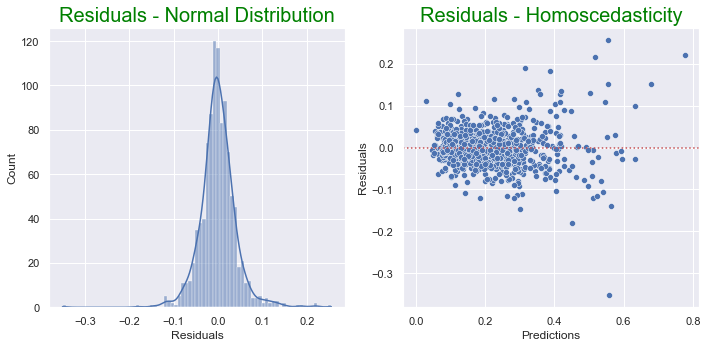

In [90]:
# Plots to show that the error distribution is nirmal and homoscedast.
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.histplot(errors, kde=True)
plt.title("Residuals - Normal Distribution", fontdict = {'fontsize' : 20, 'color':'green'})
plt.xlabel("Residuals")
plt.subplot(1,2,2)
sns.scatterplot(x=y_train_pred, y=errors)
plt.axhline(y=0, color='r', linestyle=':')
plt.title("Residuals - Homoscedasticity", fontdict = {'fontsize' : 20, 'color':'green'})
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.tight_layout()

Text(0, 0.5, 'Predictions')

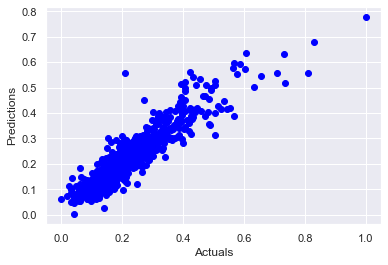

In [91]:
# Plot for Predicted salesPrice vs Actual salesPrice
plt.scatter( x=y_train , y=y_train_pred , color = 'blue')
plt.xlabel("Actuals")
plt.ylabel("Predictions")

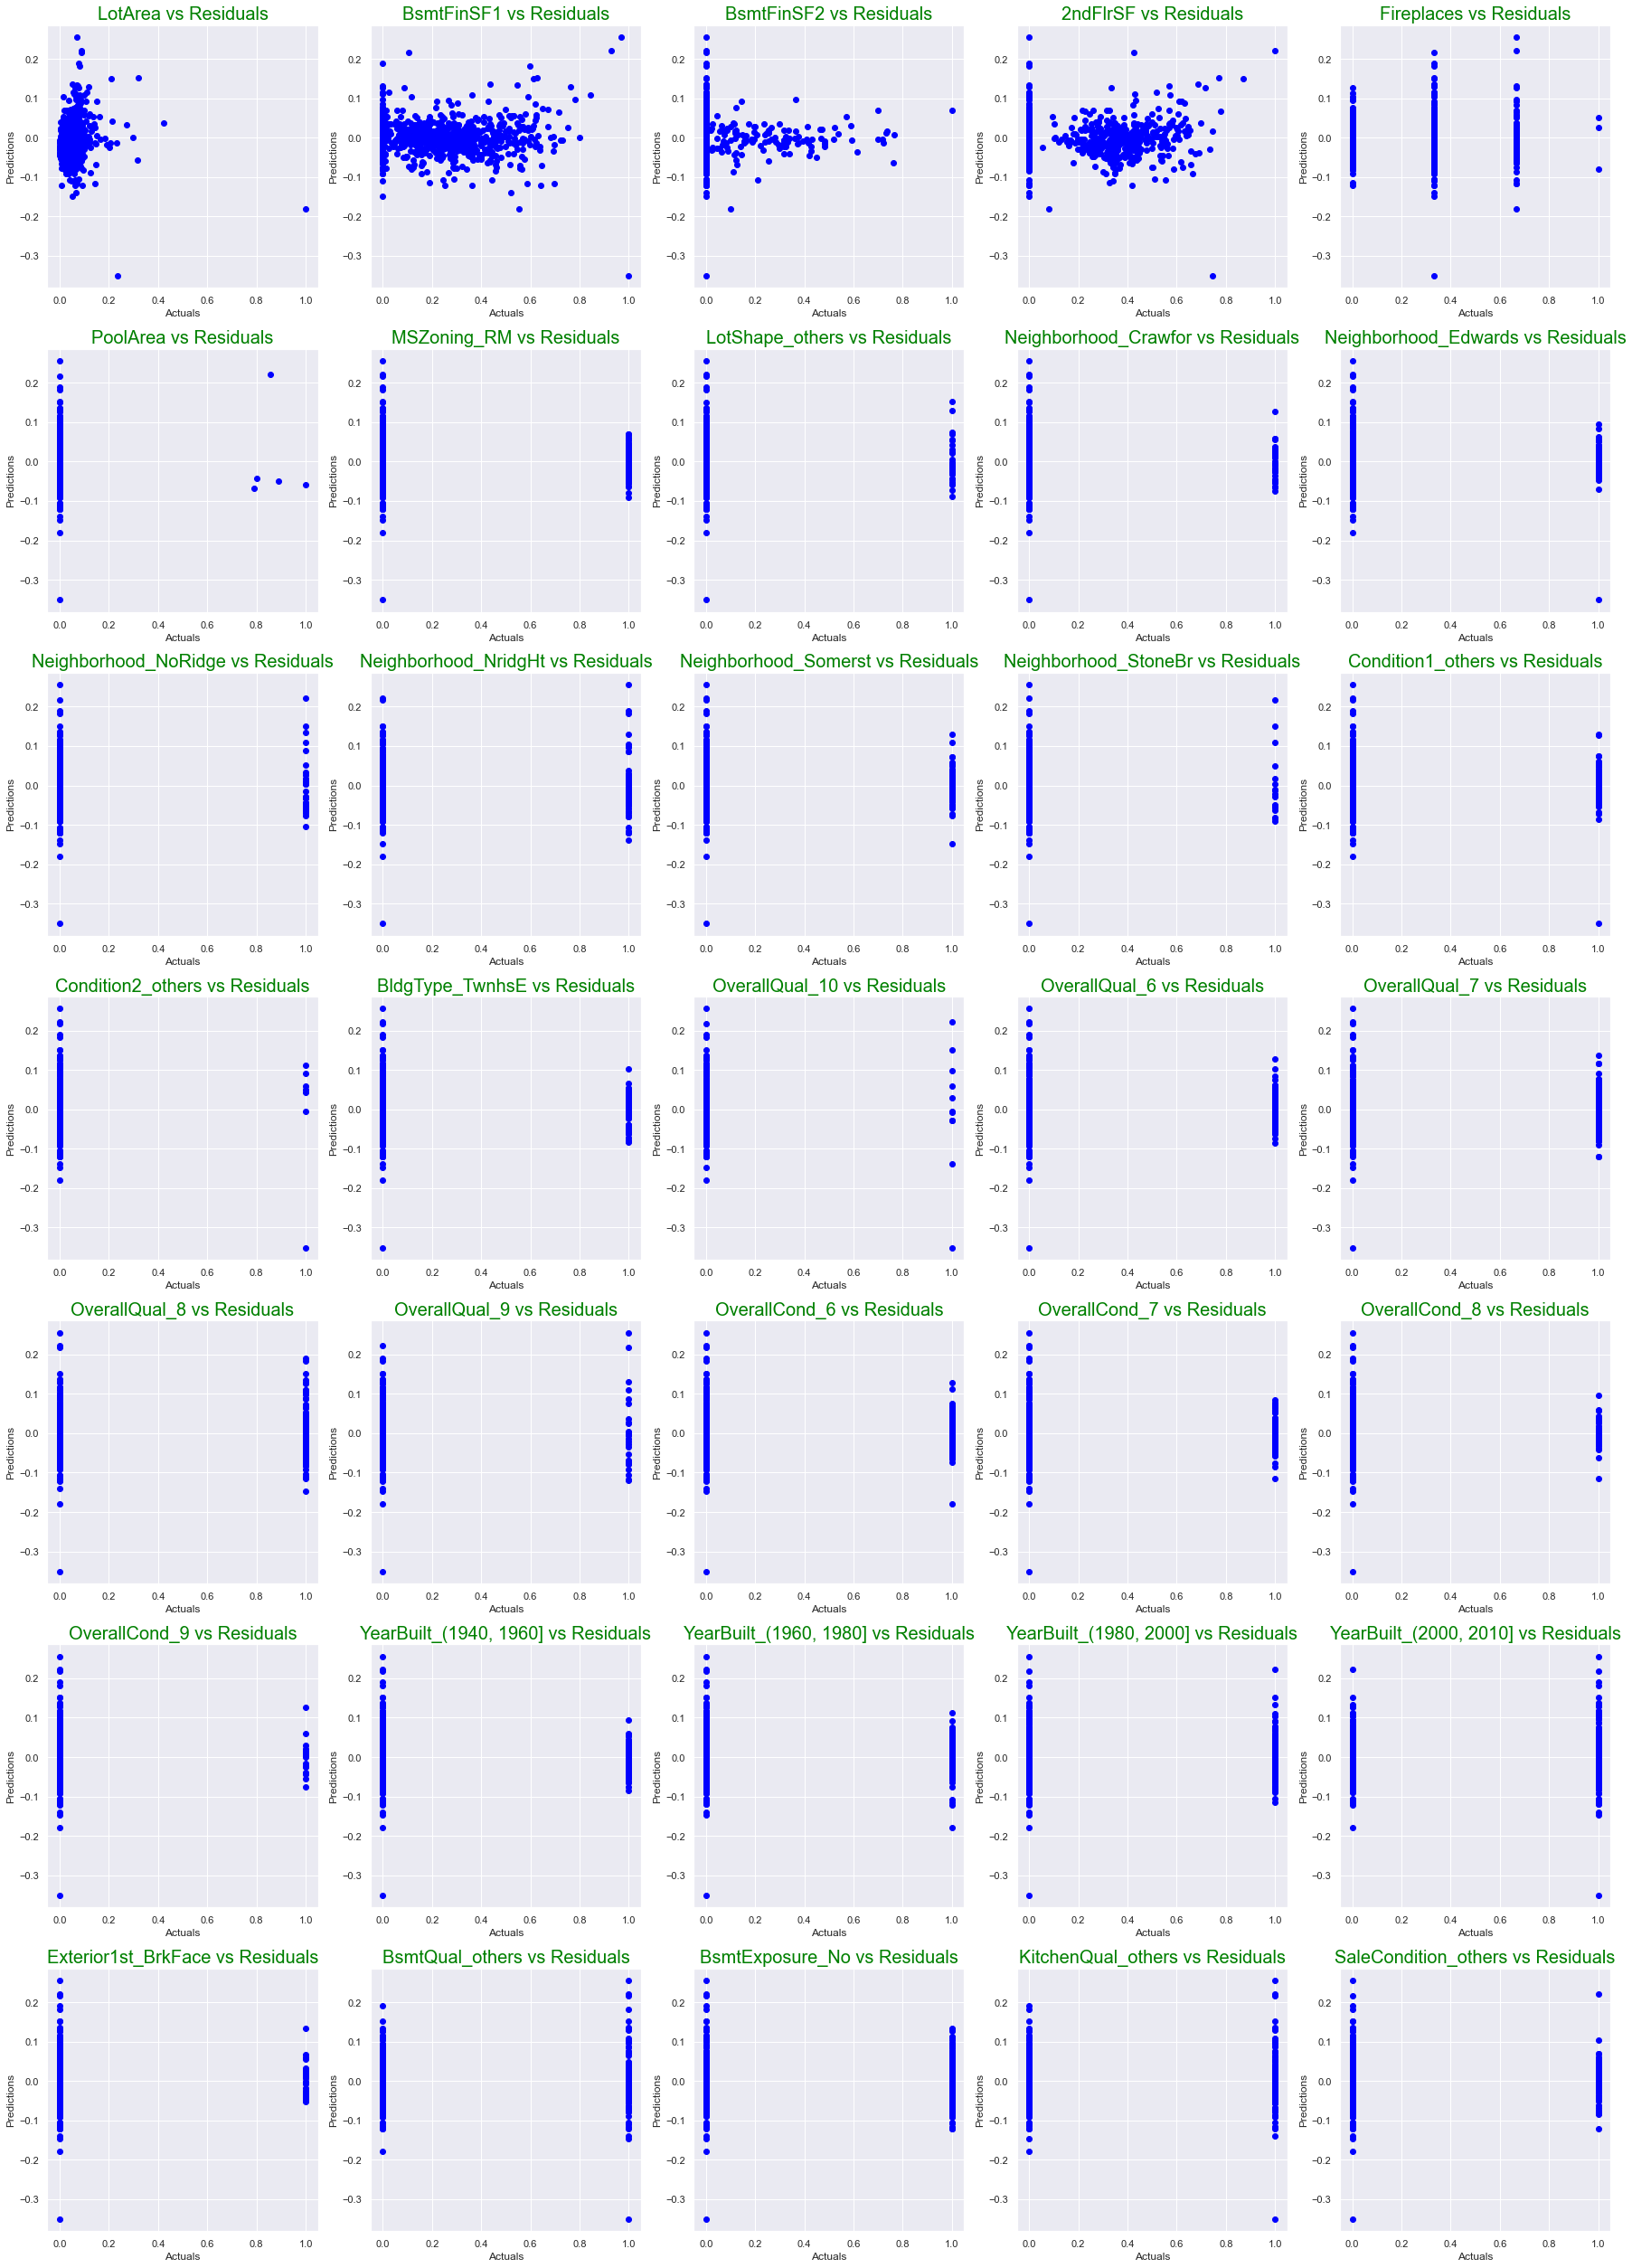

In [92]:
fig = plt.figure(figsize=(25, 35))
for i, col in enumerate(X_train.columns, 1):
    plt.subplot(7,5,i)
    plt.scatter( x=X_train[col] , y=errors , color = 'blue')
    plt.title(col+" vs Residuals", fontdict = {'fontsize' : 20, 'color':'green'})
    plt.xlabel("Actuals")
    plt.ylabel("Predictions")
    plt.tight_layout()

# 8. Predict the Test Data

In [93]:
df_test.describe()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSZoning_RM,MSZoning_others,Street_Pave,Alley_None,Alley_others,LotShape_Reg,LotShape_others,LandContour_Lvl,LandContour_others,Utilities_NoSeWa,LotConfig_Inside,LotConfig_others,LandSlope_Mod,LandSlope_others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_others,Condition2_Norm,Condition2_others,BldgType_TwnhsE,BldgType_others,HouseStyle_2Story,HouseStyle_others,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,"YearBuilt_(1900, 1920]","YearBuilt_(1920, 1940]","YearBuilt_(1940, 1960]","YearBuilt_(1960, 1980]","YearBuilt_(1980, 2000]","YearBuilt_(2000, 2010]","YearRemodAdd_(1950, 1960]","YearRemodAdd_(1960, 1970]","YearRemodAdd_(1970, 1980]","YearRemodAdd_(1980, 1990]","YearRemodAdd_(1990, 2000]","YearRemodAdd_(2000, 2010]",RoofStyle_Hip,RoofStyle_others,RoofMatl_Tar&Grv,RoofMatl_others,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_others,ExterQual_TA,ExterQual_others,ExterCond_TA,ExterCond_others,Foundation_PConc,Foundation_others,BsmtQual_TA,BsmtQual_others,BsmtCond_TA,BsmtCond_others,BsmtExposure_No,BsmtExposure_others,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,BsmtFinType2_others,Heating_GasW,Heating_others,HeatingQC_TA,HeatingQC_others,CentralAir_Y,Electrical_SBrkr,Electrical_others,KitchenQual_TA,KitchenQual_others,Functional_Typ,Functional_others,FireplaceQu_None,FireplaceQu_others,GarageType_Detchd,GarageType_others,"GarageYrBlt_(1920.0, 1940.0]","GarageYrBlt_(1940.0, 1960.0]","GarageYrBlt_(1960.0, 1980.0]","GarageYrBlt_(1980.0, 2000.0]","GarageYrBlt_(2000.0, 2010.0]",GarageYrBlt_No_year,GarageFinish_Unf,GarageFinish_others,GarageQual_TA,GarageQual_others,GarageCond_TA,GarageCond_others,PavedDrive_Y,PavedDrive_others,PoolQC_None,PoolQC_others,Fence_None,Fence_others,MiscFeature_Shed,MiscFeature_others,MoSold_jun,MoSold_others,YrSold_2009,YrSold_others,SaleType_WD,SaleType_others,SaleCondition_Partial,SaleCondition_others
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.00000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,

In [94]:
# Apply scaler() to all the columns except 'dummy' variables in Test data
df_test[nonobj_columns] = scaler.transform(df_test[nonobj_columns])
df_test.describe()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSZoning_RM,MSZoning_others,Street_Pave,Alley_None,Alley_others,LotShape_Reg,LotShape_others,LandContour_Lvl,LandContour_others,Utilities_NoSeWa,LotConfig_Inside,LotConfig_others,LandSlope_Mod,LandSlope_others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_others,Condition2_Norm,Condition2_others,BldgType_TwnhsE,BldgType_others,HouseStyle_2Story,HouseStyle_others,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,"YearBuilt_(1900, 1920]","YearBuilt_(1920, 1940]","YearBuilt_(1940, 1960]","YearBuilt_(1960, 1980]","YearBuilt_(1980, 2000]","YearBuilt_(2000, 2010]","YearRemodAdd_(1950, 1960]","YearRemodAdd_(1960, 1970]","YearRemodAdd_(1970, 1980]","YearRemodAdd_(1980, 1990]","YearRemodAdd_(1990, 2000]","YearRemodAdd_(2000, 2010]",RoofStyle_Hip,RoofStyle_others,RoofMatl_Tar&Grv,RoofMatl_others,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_others,ExterQual_TA,ExterQual_others,ExterCond_TA,ExterCond_others,Foundation_PConc,Foundation_others,BsmtQual_TA,BsmtQual_others,BsmtCond_TA,BsmtCond_others,BsmtExposure_No,BsmtExposure_others,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,BsmtFinType2_others,Heating_GasW,Heating_others,HeatingQC_TA,HeatingQC_others,CentralAir_Y,Electrical_SBrkr,Electrical_others,KitchenQual_TA,KitchenQual_others,Functional_Typ,Functional_others,FireplaceQu_None,FireplaceQu_others,GarageType_Detchd,GarageType_others,"GarageYrBlt_(1920.0, 1940.0]","GarageYrBlt_(1940.0, 1960.0]","GarageYrBlt_(1960.0, 1980.0]","GarageYrBlt_(1980.0, 2000.0]","GarageYrBlt_(2000.0, 2010.0]",GarageYrBlt_No_year,GarageFinish_Unf,GarageFinish_others,GarageQual_TA,GarageQual_others,GarageCond_TA,GarageCond_others,PavedDrive_Y,PavedDrive_others,PoolQC_None,PoolQC_others,Fence_None,Fence_others,MiscFeature_Shed,MiscFeature_others,MoSold_jun,MoSold_others,YrSold_2009,YrSold_others,SaleType_WD,SaleType_others,SaleCondition_Partial,SaleCondition_others
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000

In [95]:
# Create y_test and X_test
y_test = df_test.pop("SalePrice")
X_test = df_test

In [96]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]

X_test_lm = sm.add_constant(X_test_new)      # add constant
y_test_pred = lin_model.predict(X_test_lm)   # predict the data y_test_pred on X-test_lm

In [97]:
# Get r-square and adjusted r-square for test data
print("R-squared from sklearn", r2_score(y_test, y_test_pred), sep = " : ")

R-squared from sklearn : 0.7160864933204064


In [98]:
metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
r2_test_lr = r2_score(y_test, y_test_pred)

rss_train_lr = np.sum(np.square(y_train - y_train_pred))
rss_test_lr = np.sum(np.square(y_test - y_test_pred))
                     
mse_train_lr = mean_squared_error(y_train, y_train_pred)
mse_test_lr = mean_squared_error(y_test, y_test_pred)
                     
rmse_train_lr = mse_train_lr ** 0.5
rmse_test_lr = mse_test_lr ** 0.5

metric.append(r2_train_lr)
metric.append(r2_test_lr)
metric.append(rss_train_lr)
metric.append(rss_test_lr)
metric.append(mse_train_lr)
metric.append(mse_test_lr)
metric.append(rmse_train_lr)
metric.append(rmse_test_lr)

print("Linear regression : ")
print("r2 score for training data  : ", r2_train_lr)
print("r2 score for test data  : ", r2_test_lr)

Linear regression : 
r2 score for training data  :  0.8594411513001992
r2 score for test data  :  0.7160864933204064


# 9. Ridge Regression

#### 9.1. Plot graphs for different lambda values

r2 score using 0.0001 = 0.8594411512576183
r2 score using 0.0003 = 0.8594411509170444
r2 score using 0.0005 = 0.859441150236081
r2 score using 0.001 = 0.8594411470457304
r2 score using 0.01 = 0.8594407294299513
r2 score using 0.05 = 0.8594309857900977
r2 score using 0.1 = 0.8594022582856633
r2 score using 0.2 = 0.8592981489355196
r2 score using 0.3 = 0.8591437231018259
r2 score using 0.4 = 0.8589499390332191
r2 score using 0.5 = 0.8587249967652967
r2 score using 0.6 = 0.8584751296860526
r2 score using 0.7 = 0.8582051447320013
r2 score using 0.8 = 0.8579187978260957
r2 score using 0.9 = 0.8576190592033792
r2 score using 1.0 = 0.8573083038259636
r2 score using 2.0 = 0.8538880048931351
r2 score using 3.0 = 0.8503059406563028
r2 score using 5.0 = 0.8433163489382693
r2 score using 8.0 = 0.833582951502342
r2 score using 9.0 = 0.830526540786898
r2 score using 10 = 0.8275530880912031
r2 score using 20 = 0.8012776686601397
r2 score using 50 = 0.7422184886870904
r2 score using 100 = 0.6712492669

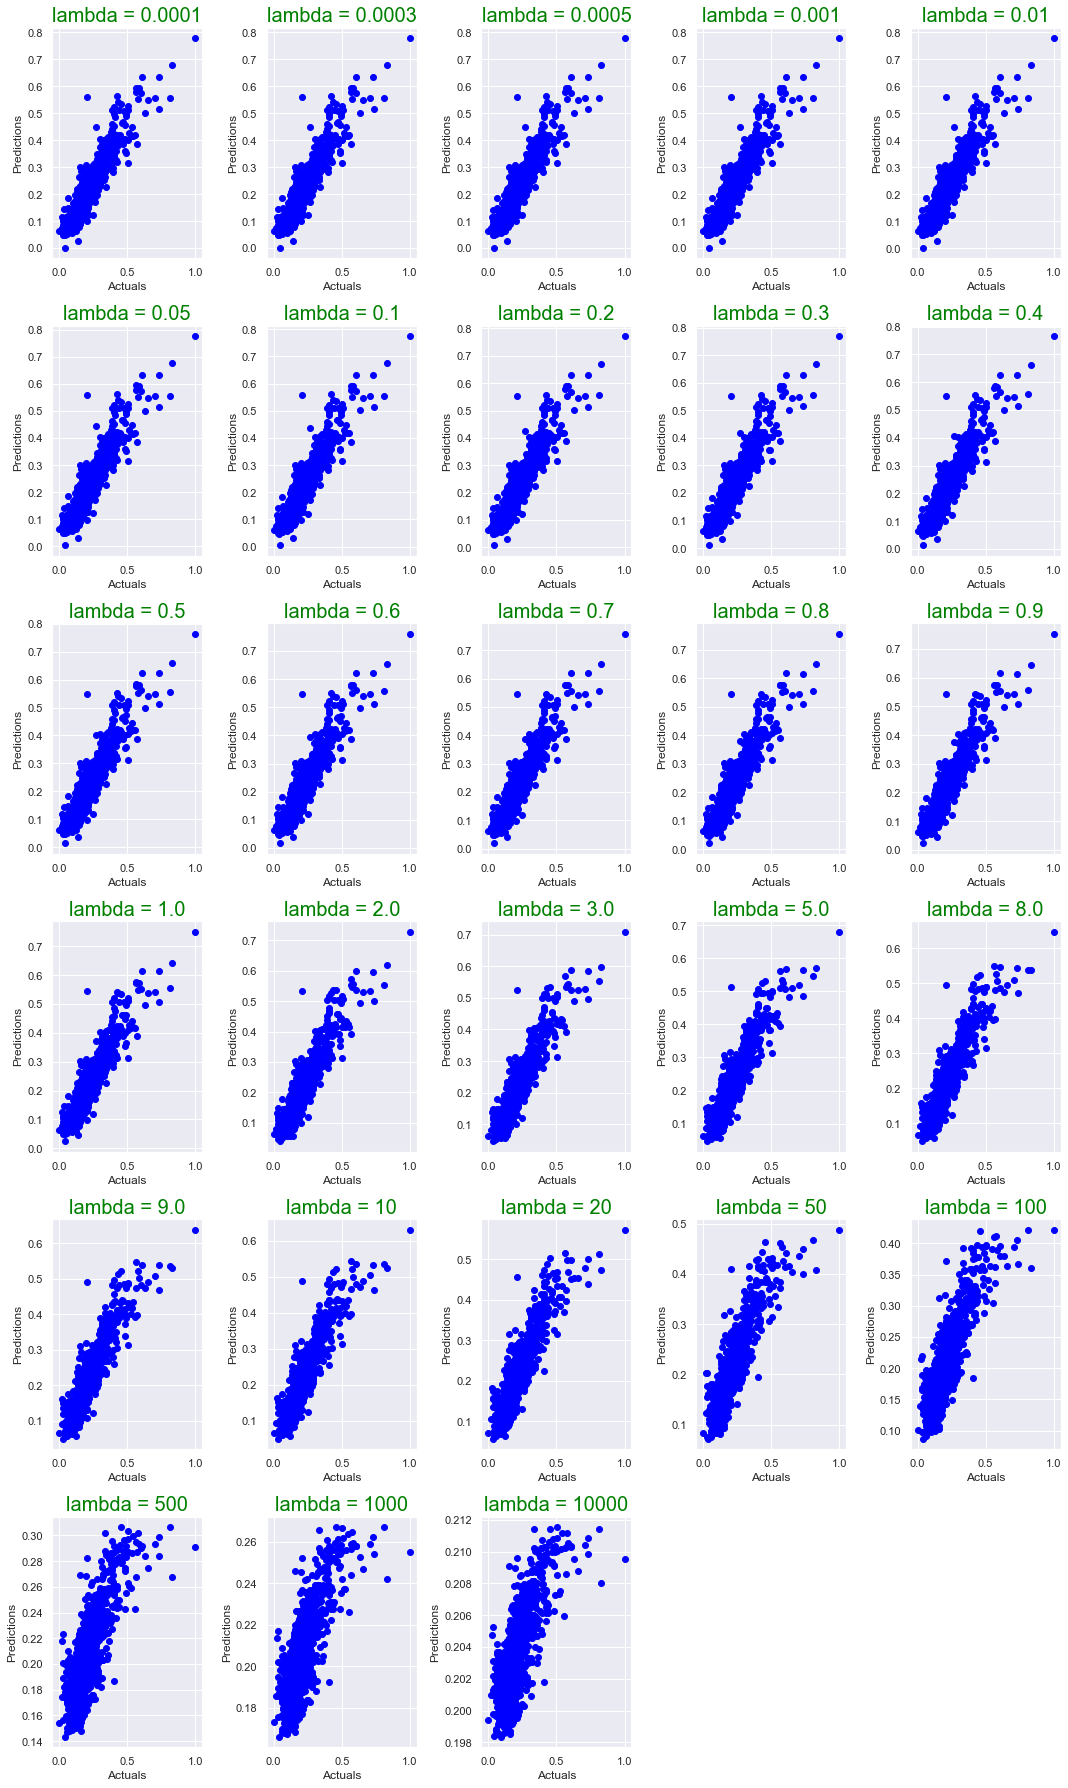

In [99]:
# Applying Ridge Regression with varying the hyperparameter 'lambda'

lambdas = [0.0001, 0.0003, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9,
                     1.0, 2.0, 3.0,5.0,8.0,9.0,10, 20,50,100, 500, 1000, 10000]
fig = plt.figure(figsize=(15, 25))
for counter, i in enumerate(lambdas, 1):
    ridgereg = Ridge(alpha = i)
    ridgereg.fit(X_train, y_train)

    #Computing the r2 score
    y_train_pred = ridgereg.predict(X_train)
    y_test_pred = ridgereg.predict(X_test_new) 
    print("r2 score using "+ str(i) +" = " + str(r2_score(y_train, y_train_pred)))  
    plt.subplot(6,5,counter)
    plt.scatter( x=y_train , y=y_train_pred , color = 'blue') 
    plt.title("lambda = " + str(i), fontdict = {'fontsize' : 20, 'color':'green'})
    plt.xlabel("Actuals")
    plt.ylabel("Predictions")
    plt.tight_layout()

#### 9.2. Get the best lambda value for Ridge Regression

In [100]:
# Applying Ridge Regression with varying the hyperparameter 'lambda'
params = {'alpha' : lambdas }
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator=ridge, param_grid = params, scoring='neg_mean_absolute_error',
                        cv=folds, return_train_score=True, verbose=1)
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0003, 0.0005, 0.001, 0.01, 0.05,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 5.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000, 10000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [101]:
# Get the best hyper parameter alpha
model_cv.best_params_['alpha']

0.0001

In [102]:
# List the top coefficients using Ridge regression

ridgereg = Ridge(alpha = model_cv.best_params_['alpha'])
ridgereg.fit(X_train, y_train)

y_train_pred = ridgereg.predict(X_train) 
y_test_pred = ridgereg.predict(X_test_new) 
print("intercept : " , ridgereg.intercept_)
print("coefficients : ", ridgereg.coef_)
s = pd.Series(ridgereg.coef_, X_train.columns)
s.sort_values(ascending=False)

intercept :  0.06643161413697721
coefficients :  [ 0.24944432  0.09603838  0.06152094  0.08053073  0.05420711  0.0748677
 -0.0178021   0.01737926  0.03059831 -0.02325341  0.09014373  0.03965507
  0.0200964   0.06202393 -0.01193077 -0.07797845 -0.03117292  0.26288938
  0.0201205   0.04895529  0.09355225  0.19388173  0.01258274  0.02431702
  0.03130723  0.04680789  0.01400484  0.01936914  0.0478644   0.07798503
  0.04273062  0.01271454 -0.00782414  0.0186744  -0.01183979]


OverallQual_10            0.262889
LotArea                   0.249444
OverallQual_9             0.193882
BsmtFinSF1                0.096038
OverallQual_8             0.093552
Neighborhood_NoRidge      0.090144
2ndFlrSF                  0.080531
YearBuilt_(2000, 2010]    0.077985
PoolArea                  0.074868
Neighborhood_StoneBr      0.062024
BsmtFinSF2                0.061521
Fireplaces                0.054207
OverallQual_7             0.048955
YearBuilt_(1980, 2000]    0.047864
OverallCond_9             0.046808
Exterior1st_BrkFace       0.042731
Neighborhood_NridgHt      0.039655
OverallCond_8             0.031307
Neighborhood_Crawfor      0.030598
OverallCond_7             0.024317
OverallQual_6             0.020120
Neighborhood_Somerst      0.020096
YearBuilt_(1960, 1980]    0.019369
KitchenQual_others        0.018674
LotShape_others           0.017379
YearBuilt_(1940, 1960]    0.014005
BsmtQual_others           0.012715
OverallCond_6             0.012583
BsmtExposure_No     

In [103]:
metric2 = []
r2_train_lr = r2_score(y_train, y_train_pred)
r2_test_lr = r2_score(y_test, y_test_pred)

rss_train_lr = np.sum(np.square(y_train - y_train_pred))
rss_test_lr = np.sum(np.square(y_test - y_test_pred))
                     
mse_train_lr = mean_squared_error(y_train, y_train_pred)
mse_test_lr = mean_squared_error(y_test, y_test_pred)
                     
rmse_train_lr = mse_train_lr ** 0.5
rmse_test_lr = mse_test_lr ** 0.5

metric2.append(r2_train_lr)
metric2.append(r2_test_lr)
metric2.append(rss_train_lr)
metric2.append(rss_test_lr)
metric2.append(mse_train_lr)
metric2.append(mse_test_lr)
metric2.append(rmse_train_lr)
metric2.append(rmse_test_lr)

print("Ridge regression : ")
print("r2 score for training data  : ", r2_train_lr)
print("r2 score for test data  : ", r2_test_lr)

Ridge regression : 
r2 score for training data  :  0.8594411512576183
r2 score for test data  :  0.7160895824090492


# 10. Lasso Regression

#### 10.1. Plot graphs for different lambda values

r2 score using 0.0001 = 0.8579698603617801
r2 score using 0.0003 = 0.8462441090940714
r2 score using 0.0005 = 0.8313223421929647
r2 score using 0.001 = 0.8015511413982666
r2 score using 0.01 = 0.2649978050395273
r2 score using 0.05 = 0.0
r2 score using 0.1 = 0.0
r2 score using 0.2 = 0.0
r2 score using 0.3 = 0.0
r2 score using 0.4 = 0.0
r2 score using 0.5 = 0.0
r2 score using 0.6 = 0.0
r2 score using 0.7 = 0.0
r2 score using 0.8 = 0.0
r2 score using 0.9 = 0.0
r2 score using 1.0 = 0.0
r2 score using 2.0 = 0.0
r2 score using 3.0 = 0.0
r2 score using 5.0 = 0.0
r2 score using 8.0 = 0.0
r2 score using 9.0 = 0.0
r2 score using 10 = 0.0
r2 score using 20 = 0.0
r2 score using 50 = 0.0
r2 score using 100 = 0.0
r2 score using 500 = 0.0
r2 score using 1000 = 0.0
r2 score using 10000 = 0.0


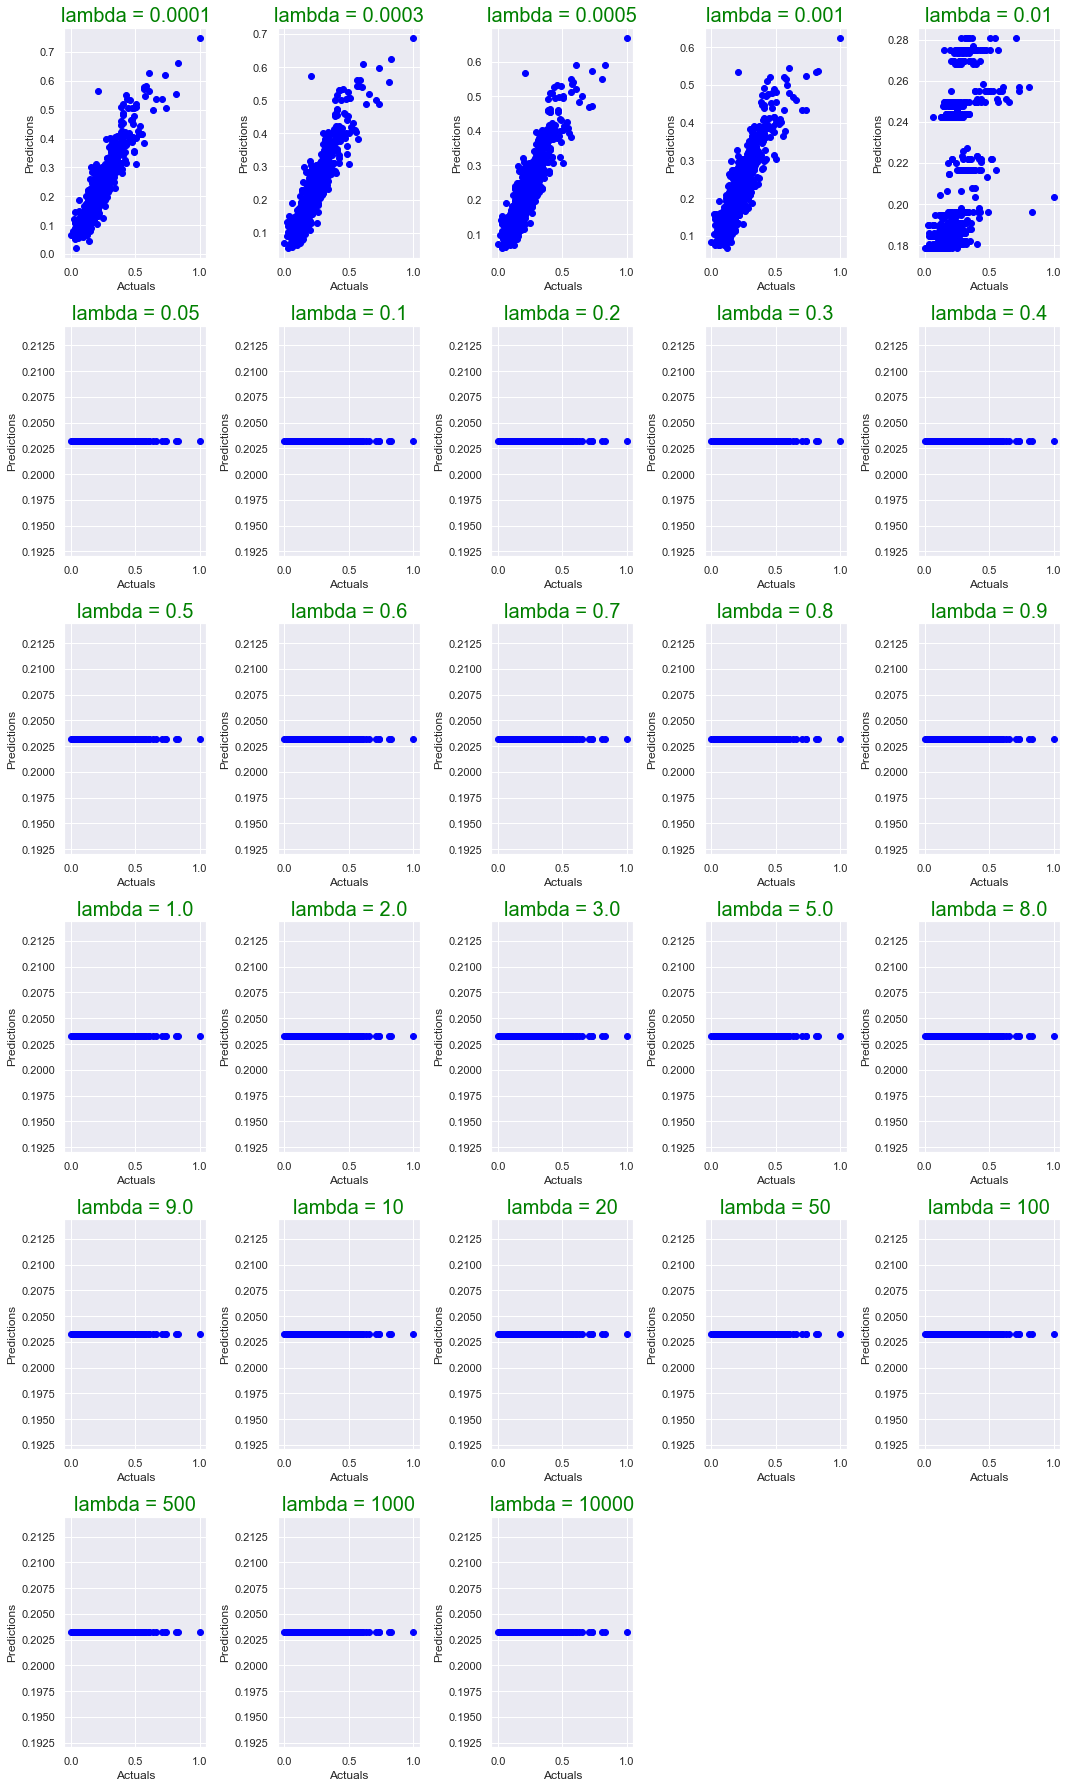

In [104]:
fig = plt.figure(figsize=(15, 25))
for counter, i in enumerate(lambdas, 1):
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_train, y_train)

    #Computing the r2 score
    y_train_pred = lassoreg.predict(X_train)
    y_test_pred = lassoreg.predict(X_test_new) 
    print("r2 score using "+ str(i) +" = " + str(r2_score(y_train, y_train_pred)))  
    plt.subplot(6,5,counter)
    plt.scatter( x=y_train , y=y_train_pred , color = 'blue') 
    plt.title("lambda = " + str(i), fontdict = {'fontsize' : 20, 'color':'green'})
    plt.xlabel("Actuals")
    plt.ylabel("Predictions")
    plt.tight_layout()

#### 10.2. Get the best lambda value for Lasso Regression

In [105]:
# Applying Lasso Regression with varying the hyperparameter 'lambda'
params = {'alpha' : lambdas }
lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso, param_grid = params, scoring='neg_mean_absolute_error',
                        cv=folds, return_train_score=True, verbose=1)
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0003, 0.0005, 0.001, 0.01, 0.05,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 5.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000, 10000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [106]:
# Get the best hyper parameter alpha
model_cv.best_params_['alpha']

0.0001

In [107]:
# List the top coefficients using Lasso regression
lassoreg = Lasso(alpha = model_cv.best_params_['alpha'])
lassoreg.fit(X_train, y_train)

y_train_pred = lassoreg.predict(X_train)
y_test_pred = lassoreg.predict(X_test_new) 
print("intercept : " , lassoreg.intercept_)
print("coefficients : ", lassoreg.coef_)
s = pd.Series(lassoreg.coef_, X_train.columns)
s.sort_values(ascending=False)

intercept :  0.07679960892907761
coefficients :  [ 0.19384489  0.0984648   0.05602656  0.08058674  0.05855506  0.04960613
 -0.02101422  0.01679458  0.02609648 -0.02382147  0.0874432   0.03665958
  0.01661232  0.05507171 -0.01002249 -0.0587411  -0.02951169  0.25086738
  0.01837714  0.04728226  0.09221854  0.1896992   0.0093198   0.02108844
  0.02615009  0.0369471   0.00936843  0.01445227  0.04241555  0.07268215
  0.03888469  0.01288764 -0.00894304  0.01859198 -0.01140814]


OverallQual_10            0.250867
LotArea                   0.193845
OverallQual_9             0.189699
BsmtFinSF1                0.098465
OverallQual_8             0.092219
Neighborhood_NoRidge      0.087443
2ndFlrSF                  0.080587
YearBuilt_(2000, 2010]    0.072682
Fireplaces                0.058555
BsmtFinSF2                0.056027
Neighborhood_StoneBr      0.055072
PoolArea                  0.049606
OverallQual_7             0.047282
YearBuilt_(1980, 2000]    0.042416
Exterior1st_BrkFace       0.038885
OverallCond_9             0.036947
Neighborhood_NridgHt      0.036660
OverallCond_8             0.026150
Neighborhood_Crawfor      0.026096
OverallCond_7             0.021088
KitchenQual_others        0.018592
OverallQual_6             0.018377
LotShape_others           0.016795
Neighborhood_Somerst      0.016612
YearBuilt_(1960, 1980]    0.014452
BsmtQual_others           0.012888
YearBuilt_(1940, 1960]    0.009368
OverallCond_6             0.009320
BsmtExposure_No     

In [108]:
metric3 = []
r2_train_lr = r2_score(y_train, y_train_pred)
r2_test_lr = r2_score(y_test, y_test_pred)

rss_train_lr = np.sum(np.square(y_train - y_train_pred))
rss_test_lr = np.sum(np.square(y_test - y_test_pred))
                     
mse_train_lr = mean_squared_error(y_train, y_train_pred)
mse_test_lr = mean_squared_error(y_test, y_test_pred)
                     
rmse_train_lr = mse_train_lr ** 0.5
rmse_test_lr = mse_test_lr ** 0.5

metric3.append(r2_train_lr)
metric3.append(r2_test_lr)
metric3.append(rss_train_lr)
metric3.append(rss_test_lr)
metric3.append(mse_train_lr)
metric3.append(mse_test_lr)
metric3.append(rmse_train_lr)
metric3.append(rmse_test_lr)

print("Lasso regression : ")
print("r2 score for training data  : ", r2_train_lr)
print("r2 score for test data  : ", r2_test_lr)

Lasso regression : 
r2 score for training data  :  0.8579698603617801
r2 score for test data  :  0.7296510149715075


In [109]:
# Metrics to give an overall sense of error in the model
print("Lasso regression : ")
print("rss for training data: ",np.sum(np.square(y_train - y_train_pred)))
print("rss for test data: ",np.sum(np.square(y_test - y_test_pred)), "\n")
mse = mean_squared_error(y_train, y_train_pred)
print("mse for training data : ", mse)
print("mse for test data : ", mean_squared_error(y_test, y_test_pred), "\n")
rmse = mse**0.5
print("rmse for training data : ", rmse)
print("rmse for test data : ", mean_squared_error(y_test, y_test_pred)**0.5)

Lasso regression : 
rss for training data:  1.832235561309656
rss for test data:  1.4903331668749153 

mse for training data :  0.0017927940913010333
mse for test data :  0.003402587138983825 

rmse for training data :  0.04234139926007445
rmse for test data :  0.058331699263640735


# 11. Comparison

In [110]:
# Construct a dataframe to show different metrics across different models
lr_table = {'Metric' : ['R2 Score (Train)',
                        'R2 Score (Test)', 
                        'RSS (Train)', 
                        'RSS (Test)', 
                        'MSE (Train)', 
                        'MSE (Test)',
                        'RMSE (Train)', 
                        'RMSE (Test)'], 
            'Linear Regression': metric}
lr_metric = pd.DataFrame(lr_table)
lr_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Linear Regression'])
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.859441,0.859441,0.857970
1,R2 Score (Test),0.716086,0.716090,0.729651
2,RSS (Train),1.813255,1.813255,1.832236
3,RSS (Test),1.565109,1.565092,1.490333
4,MSE (Train),0.001774,0.001774,0.001793
5,MSE (Test),0.003573,0.003573,0.003403
6,RMSE (Train),0.042122,0.042122,0.042341
7,RMSE (Test),0.059777,0.059777,0.058332


In [111]:
betas = pd.DataFrame(index = X_train.columns)

In [112]:
betas.rows = X_train.columns

<ipython-input-112-817434e33085>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train.columns


In [113]:
# Construct a dataframe to show regression coefficients across different models
betas['Linear'] = lin_model.params
betas['Ridge'] = ridgereg.coef_
betas['Lasso'] = lassoreg.coef_
betas

,Linear,Ridge,Lasso
LotArea,0.249459,0.249444,0.193845
BsmtFinSF1,0.096038,0.096038,0.098465
BsmtFinSF2,0.061521,0.061521,0.056027
2ndFlrSF,0.080530,0.080531,0.080587
Fireplaces,0.054206,0.054207,0.058555
PoolArea,0.074869,0.074868,0.049606
MSZoning_RM,-0.017802,-0.017802,-0.021014
LotShape_others,0.017379,0.017379,0.016795
Neighborhood_Crawfor,0.030598,0.030598,0.026096
Neighborhood_Edwards,-0.023253,-0.023253,-0.023821


# Question -1

In [114]:
# Double the value of alpha for Ridge regression

ridgereg = Ridge(alpha = 0.0002)
ridgereg.fit(X_train, y_train)

y_train_pred = ridgereg.predict(X_train) 
y_test_pred = ridgereg.predict(X_test_new)
print("Ridge regression : ")
print("r2 score for training data  : ", r2_score(y_train, y_train_pred))
print("r2 score for test data  : ", r2_score(y_test, y_test_pred))
print("intercept : " , ridgereg.intercept_)
print("coefficients : ", ridgereg.coef_)
s = pd.Series(ridgereg.coef_, X_train.columns)
s.sort_values(ascending=False)

Ridge regression : 
r2 score for training data  :  0.8594411511298921
r2 score for test data  :  0.7160926709188328
intercept :  0.0664327112500786
coefficients :  [ 0.24942938  0.09603898  0.06152081  0.08053108  0.05420814  0.07486648
 -0.01780249  0.01737994  0.03059813 -0.02325358  0.09014394  0.03965524
  0.02009634  0.06202401 -0.01193066 -0.07797576 -0.03117326  0.26288512
  0.02012016  0.04895474  0.09355136  0.19387966  0.01258262  0.02431691
  0.03130699  0.04680766  0.01400466  0.01936897  0.04786431  0.07798512
  0.04273054  0.01271487 -0.00782441  0.01867476 -0.01183981]


OverallQual_10            0.262885
LotArea                   0.249429
OverallQual_9             0.193880
BsmtFinSF1                0.096039
OverallQual_8             0.093551
Neighborhood_NoRidge      0.090144
2ndFlrSF                  0.080531
YearBuilt_(2000, 2010]    0.077985
PoolArea                  0.074866
Neighborhood_StoneBr      0.062024
BsmtFinSF2                0.061521
Fireplaces                0.054208
OverallQual_7             0.048955
YearBuilt_(1980, 2000]    0.047864
OverallCond_9             0.046808
Exterior1st_BrkFace       0.042731
Neighborhood_NridgHt      0.039655
OverallCond_8             0.031307
Neighborhood_Crawfor      0.030598
OverallCond_7             0.024317
OverallQual_6             0.020120
Neighborhood_Somerst      0.020096
YearBuilt_(1960, 1980]    0.019369
KitchenQual_others        0.018675
LotShape_others           0.017380
YearBuilt_(1940, 1960]    0.014005
BsmtQual_others           0.012715
OverallCond_6             0.012583
BsmtExposure_No     

In [115]:
# Double the value of alpha for Lasso regression

lassoreg = Lasso(alpha = 0.0002)
lassoreg.fit(X_train, y_train)

y_train_pred = lassoreg.predict(X_train) 
y_test_pred = lassoreg.predict(X_test_new)
print("Lasso regression : ")
print("r2 score for training data  : ", r2_score(y_train, y_train_pred))
print("r2 score for test data  : ", r2_score(y_test, y_test_pred))
print("intercept : " , lassoreg.intercept_)
print("coefficients : ", lassoreg.coef_)
s = pd.Series(lassoreg.coef_, X_train.columns)
s.sort_values(ascending=False)

Lasso regression : 
r2 score for training data  :  0.8535585581985314
r2 score for test data  :  0.7364602713420234
intercept :  0.08715029484048192
coefficients :  [ 0.13823812  0.10088491  0.05052579  0.08064876  0.06290891  0.02435045
 -0.02421761  0.01620904  0.02160381 -0.02438752  0.08474286  0.03366841
  0.0131304   0.04812545 -0.00811266 -0.03949846 -0.02785422  0.23882627
  0.01662745  0.04560028  0.09087357  0.18550058  0.00606181  0.01786546
  0.02100021  0.02709412  0.0047487   0.00955392  0.03699098  0.06740279
  0.03504184  0.01306185 -0.01006131  0.01851293 -0.01097503]


OverallQual_10            0.238826
OverallQual_9             0.185501
LotArea                   0.138238
BsmtFinSF1                0.100885
OverallQual_8             0.090874
Neighborhood_NoRidge      0.084743
2ndFlrSF                  0.080649
YearBuilt_(2000, 2010]    0.067403
Fireplaces                0.062909
BsmtFinSF2                0.050526
Neighborhood_StoneBr      0.048125
OverallQual_7             0.045600
YearBuilt_(1980, 2000]    0.036991
Exterior1st_BrkFace       0.035042
Neighborhood_NridgHt      0.033668
OverallCond_9             0.027094
PoolArea                  0.024350
Neighborhood_Crawfor      0.021604
OverallCond_8             0.021000
KitchenQual_others        0.018513
OverallCond_7             0.017865
OverallQual_6             0.016627
LotShape_others           0.016209
Neighborhood_Somerst      0.013130
BsmtQual_others           0.013062
YearBuilt_(1960, 1980]    0.009554
OverallCond_6             0.006062
YearBuilt_(1940, 1960]    0.004749
Condition1_others   

# Question - 3

#### The top features for Lasso are 
OverallQual_10,            
LotArea,                 
OverallQual_9,             
BsmtFinSF1, and               
OverallQual_8            

In [116]:
# Remove the top 5 predictors for Lasso regression
print(X_train.shape)
print(X_train.columns)
X_train = X_train.drop(["OverallQual_10"], axis = 1)
X_train = X_train.drop(["LotArea"], axis = 1)
X_train = X_train.drop(["OverallQual_9"], axis = 1)
X_train = X_train.drop(["BsmtFinSF1"], axis = 1)
X_train = X_train.drop(["OverallQual_8"], axis = 1)

lassoreg = Lasso(alpha = 0.0001)
lassoreg.fit(X_train, y_train)

y_train_pred = lassoreg.predict(X_train) 
y_test_pred = lassoreg.predict(X_test[X_train.columns])
print("Lasso regression : ")
print("r2 score for training data  : ", r2_score(y_train, y_train_pred))
print("r2 score for test data  : ", r2_score(y_test, y_test_pred))
print("intercept : " , lassoreg.intercept_)
print("coefficients : ", lassoreg.coef_)
s = pd.Series(lassoreg.coef_, X_train.columns)
s.sort_values(ascending=False)

(1022, 35)
Index(['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', '2ndFlrSF', 'Fireplaces',
       'PoolArea', 'MSZoning_RM', 'LotShape_others', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_others',
       'Condition2_others', 'BldgType_TwnhsE', 'OverallQual_10',
       'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9',
       'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9',
       'YearBuilt_(1940, 1960]', 'YearBuilt_(1960, 1980]',
       'YearBuilt_(1980, 2000]', 'YearBuilt_(2000, 2010]',
       'Exterior1st_BrkFace', 'BsmtQual_others', 'BsmtExposure_No',
       'KitchenQual_others', 'SaleCondition_others'],
      dtype='object')
Lasso regression : 
r2 score for training data  :  0.7587079850855707
r2 score for test data  :  0.6665692352194326
intercept :  0.09827768742121967
coefficients :  [ 0.03524487  0.07553742  0.1218667   0.118

Neighborhood_NoRidge      0.144265
YearBuilt_(2000, 2010]    0.124805
Fireplaces                0.121867
Neighborhood_StoneBr      0.121382
PoolArea                  0.118539
YearBuilt_(1980, 2000]    0.088403
Neighborhood_NridgHt      0.084488
2ndFlrSF                  0.075537
OverallCond_9             0.064988
KitchenQual_others        0.055346
Exterior1st_BrkFace       0.051440
Neighborhood_Crawfor      0.037334
BsmtQual_others           0.035495
BsmtFinSF2                0.035245
OverallCond_8             0.033521
YearBuilt_(1960, 1980]    0.032483
Neighborhood_Somerst      0.030218
OverallCond_7             0.025982
LotShape_others           0.021366
YearBuilt_(1940, 1960]    0.014237
OverallCond_6             0.013303
Condition2_others        -0.000000
Condition1_others        -0.002055
OverallQual_7            -0.004169
OverallQual_6            -0.006592
SaleCondition_others     -0.011893
BsmtExposure_No          -0.019911
MSZoning_RM              -0.025715
Neighborhood_Edwards